<a href="https://colab.research.google.com/github/dhruvmojila/Simulation-data-analysis-with-Predict-Students-Dropout-and-Academic-Success-dataset/blob/main/MA_540_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulation data analysis with *Predict Students' Dropout and Academic Success* dataset**

# **Abstract**

This project represents understanding of various continuous and descrete random variable distributions such as normal distribution, log normal distribution, bernoulli distribution, binomial distribution and many more through simulation. After simulating randomly distributed data various statistical task performed on the data to understand the nature of data, visualization is also done to analyze the shape of data distribution. Moreover, outlier detection is performed to find out exciting features or to remove garbage data. In addition to that, various simulation techniques such as markov chains including it's properties such as recurrent events, ergodicity, sensitivity analysis, and many more; and variance reduction techniques are performed to analyze the data. Finally, real data analysis is performed on "Predict Students' Dropout and Academic Success" dataset which includes performing factor analysis, joint distibution analysis and bayes theorem on real data.

# **Chapter 1: Introduction**

Simulating data is an important method for data science-related projects and research because, rather than working with the original data, which may not always be available, one can simulate data and understand its characteristics to improve the accuracy of the final product. This project simulates some popular distributions and provides in-depth analysis to make real-world data distribution simple to understand. Statistical analysis, central limit theorem verification, outlier detection, and probability calculation are performed for continuous random variables such as normal distribution and log normal distribution, and discrete random variables such as bernoulli distribution and binomial distribution. Visualisation is performed for every distribution to understand the shape of the distribution. Moreover, markov chains are implemented on simulated data to understand the transition state matrix, recurrent events, and ergodicity. Sensitivity analysis was carried out to understand how a small change in any state of the Markov chain affects the probabilities. As a next step, variance reduction techniques such as importance sampling and control variates are simulated to analyse how these techniques help increase accuracy and efficiency. Then, this project compare these various simulation techniques and performed combinatorial analysis. Finally, analyses are performed on a real-world dataset named **Predict Students' Dropout and Academic Success**. This dataset is taken from the UC Irvine Machine Learning Repository. To start with, preprocessing steps are performed on this data initially, such as handling missing values, handling categorical features, and many more. To reduce the dimensions of the data, factor analysis is performed, which makes the calculation cost less without affecting accuracy too much. Bayes Theorem and Joint distribution analyses are also implemented on a preprocessed dataset.

# **Chapter 2: Data Description**
The dataset Predict Students' Dropout and Academic Success aims to contribute to the reduction of academic dropout and failure in higher education by using machine learning techniques to identify students at risk at an early stage of their academic path so that strategies to support them can be put into place. The data has a total of 36 features or independent variables and 1 target or dependent variable. These 36 features include information known at the time of student enrollment, such as academic path, demographics, and social-economic factors. Students are divided into three classes: dropout, enrolled, and graduate. The dataset only includes one categorical variable, which is the target variable; the remaining features are by default in numeric format. Categorical value of encoded features can be found on home page of dataset [Predict Students' Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)


# **Chapter 3,4: Methodology, Analysis and Results**
# **Simulation Data Analysis**

**Simulating Continuous Random Variables**

Libraries imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import norm
import pandas as pd

*Normal Distribution*

We can generate nomral distibution with this code of numpy library. We need three arguments for this code to run.
1.   Mean (m)
2.   Standard Deviation (sd)
3.   Number of data to be generated (n)

```
# np.random.normal(...)
```



In [ ]:
m = int(input("Enter mean to generate normal distibution: "))
sd = int(input("Enter standard deviation to generate normal distibution: "))
n = int(input("Enter number of data to generate with normal distibution: "))

norm_data = np.random.normal(m,sd,n)

Enter mean to generate normal distibution: 0
Enter standard deviation to generate normal distibution: 1
Enter number of data to generate with normal distibution: 1000


**Statistical Analysis**

**Kurtosis** : Kurtosis is a measure of the tailedness of a distribution. It shows how sharp the bell curve is for the distribution. Cloas to 0 Kurtosis refer to normal distribution.

**Skewness** : It show the a measure of the asymmetry of a probability distribution such as left skewness or right skewness. If skewness value is close to 0 means symmetric distribution.

In [ ]:
norm_data_mean = np.mean(norm_data)
norm_data_standard_deviation = np.std(norm_data)
norm_data_var = np.var(norm_data)

norm_data_quantile_1,norm_data_median,norm_data_quantile_3 = np.quantile(norm_data, [0.25,0.5,0.75])
norm_data_mode = st.mode(norm_data)
norm_data_kurtosis = st.kurtosis(norm_data)
norm_data_skewness = st.skew(norm_data)

print(f'Mean of given data : {norm_data_mean}')
print(f'Standard Deviation of given data : {norm_data_standard_deviation}')
print(f'Variance of given data : {norm_data_var}')
print(f'First quantile of given data : {norm_data_quantile_1}')
print(f'Third quantile of given data : {norm_data_quantile_3}')
print(f'Second quantile or Median of given data : {norm_data_median}')
print(f'Mode of given data : {norm_data_mode.mode}')
print(f'Kurtosis of given data : {norm_data_kurtosis}')
print(f'Skewness of given data : {norm_data_skewness}')


Mean of given data : 0.026982166990429924
Standard Deviation of given data : 1.0180904878982167
Variance of given data : 1.0365082415488287
First quantile of given data : -0.6918034010216872
Third quantile of given data : 0.7146438577808093
Second quantile or Median of given data : 0.036152693686389376
Mode of given data : -3.6563551709462807
Kurtosis of given data : 0.0037851468318463866
Skewness of given data : -0.0498988865848694


The first quantile says that 25 percent of the distribution values falls below -0.69

The second-quantile says that 50 percent of the distribution values falls below 0.036

The third quartile represents that 75 percent of the data falls below 0.71

**Visualization**

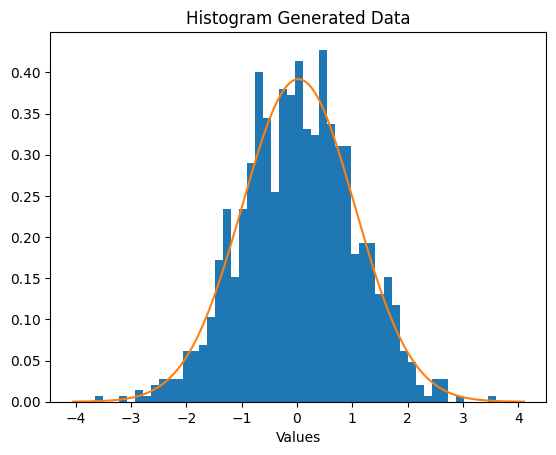

In [ ]:
bins = 50
plt.hist(norm_data, bins, density=True)
range_x = np.linspace(norm_data.mean()-4*norm_data.std(),norm_data.mean()+4*norm_data.std(),n)
y = st.norm(loc=norm_data.mean(),scale=norm_data.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram Generated Data')
plt.show()

Normal distribution depicts bell-shaped curve.

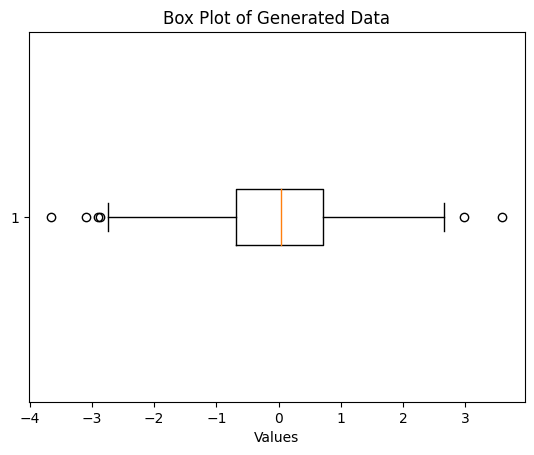

In [ ]:
plt.boxplot(norm_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

**Central Limit Theorem Verification**

In probability theory, this theorem states that the distribution of a sample variable approximates a normal distribution (a “bell curve”) as the sample size becomes larger, regardless of the population's actual distribution shape.

In [ ]:
sample = np.random.choice(norm_data, size=50, replace=False)
sample

array([ 2.97528348, -0.14561901, -0.40579284, -0.78165329, -0.89454394,
       -0.60243198, -1.02161768,  0.89580131,  0.1480193 ,  0.01360529,
        0.67911668,  1.32549408,  0.86736282, -1.93169945,  1.62086245,
        1.0364755 ,  0.88398252,  0.75776281,  1.22475135, -0.87783434,
       -0.411773  ,  0.91976997, -0.68793454, -1.67880916, -0.71668882,
       -0.19835673,  1.61764824,  2.2235472 ,  0.105265  , -0.29879194,
        0.48375632,  0.66934887,  1.67255191,  1.09087112,  0.01465306,
       -1.83540683, -0.33912556, -0.56455491, -1.52844284, -2.33000298,
        0.83958745, -0.62642357,  0.37894127, -0.34035555, -1.72612238,
        1.29794365, -1.34659893,  0.22976316, -0.7139376 ,  0.17422828])

In [ ]:
sample.mean()

0.042837504205913195

Verification for central limit theorem for 1000 samples of size 10.

In [ ]:
calculated_means_of_sample = []
no_of_sample = 1000
sample_size = 10
for i in range(no_of_sample):
  ith_sample = np.random.choice(norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample.append(ith_sample_mean)

calculated_means_of_sample = np.array(calculated_means_of_sample)

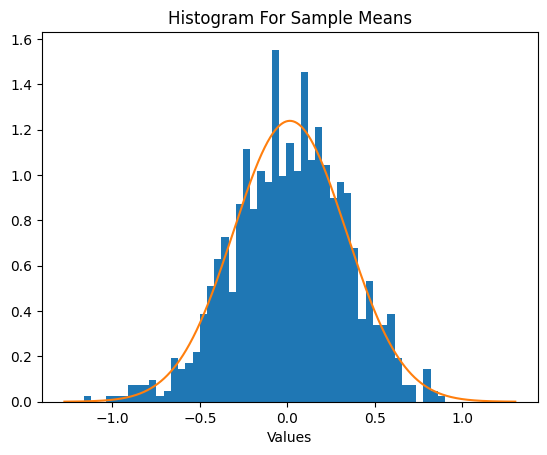

In [ ]:
bins = 50
plt.hist(calculated_means_of_sample, bins, density=True)
range_x = np.linspace(calculated_means_of_sample.mean()-4*calculated_means_of_sample.std(),calculated_means_of_sample.mean()+4*calculated_means_of_sample.std(),n)
y = st.norm(loc=calculated_means_of_sample.mean(),scale=calculated_means_of_sample.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 30.

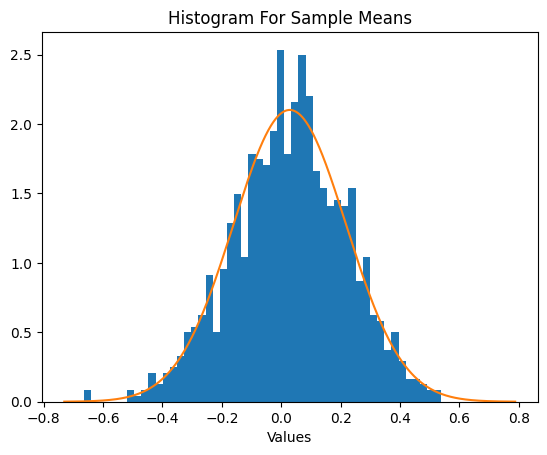

In [ ]:
calculated_means_of_sample = []
no_of_sample = 1000
sample_size = 30
for i in range(no_of_sample):
  ith_sample = np.random.choice(norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample.append(ith_sample_mean)

calculated_means_of_sample = np.array(calculated_means_of_sample)

bins = 50
plt.hist(calculated_means_of_sample, bins, density=True)
range_x = np.linspace(calculated_means_of_sample.mean()-4*calculated_means_of_sample.std(),calculated_means_of_sample.mean()+4*calculated_means_of_sample.std(),n)
y = st.norm(loc=calculated_means_of_sample.mean(),scale=calculated_means_of_sample.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 50.

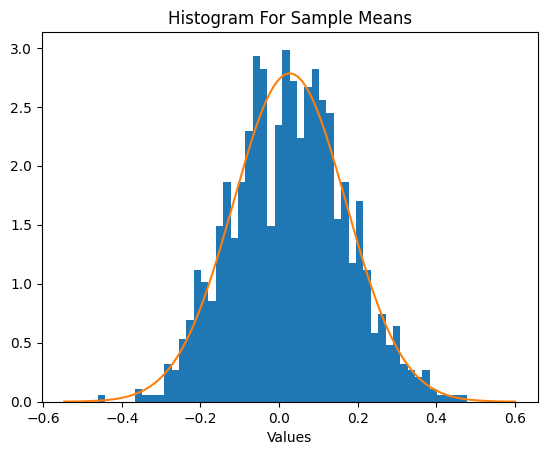

In [ ]:
calculated_means_of_sample = []
no_of_sample = 1000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample.append(ith_sample_mean)

calculated_means_of_sample = np.array(calculated_means_of_sample)

bins = 50
plt.hist(calculated_means_of_sample, bins, density=True)
range_x = np.linspace(calculated_means_of_sample.mean()-4*calculated_means_of_sample.std(),calculated_means_of_sample.mean()+4*calculated_means_of_sample.std(),n)
y = st.norm(loc=calculated_means_of_sample.mean(),scale=calculated_means_of_sample.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 3000 samples of size 40.

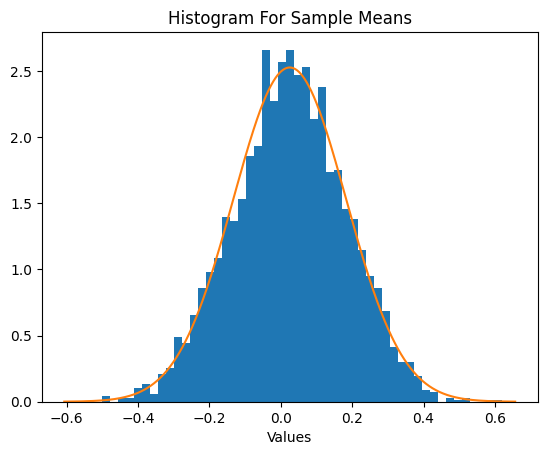

In [ ]:
calculated_means_of_sample = []
no_of_sample = 3000
sample_size = 40
for i in range(no_of_sample):
  ith_sample = np.random.choice(norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample.append(ith_sample_mean)

calculated_means_of_sample = np.array(calculated_means_of_sample)

bins = 50
plt.hist(calculated_means_of_sample, bins, density=True)
range_x = np.linspace(calculated_means_of_sample.mean()-4*calculated_means_of_sample.std(),calculated_means_of_sample.mean()+4*calculated_means_of_sample.std(),n)
y = st.norm(loc=calculated_means_of_sample.mean(),scale=calculated_means_of_sample.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

It can be observed that with increse in sample size the bell curve become more sharper.

**Outlier Detection**

Outlier Detection with standard deviation

In [ ]:
higher_bound = norm_data_mean + 3*norm_data_standard_deviation
higher_bound

3.0812536306850795

In [ ]:
lower_bound = norm_data_mean - 3*norm_data_standard_deviation
lower_bound

-3.02728929670422

In [ ]:
outliers = []
for data_point in norm_data:
  if data_point > higher_bound:
    outliers.append(data_point)
  if data_point <  lower_bound:
    outliers.append(data_point)

outliers

[-3.091660266924839, -3.6563551709462807, 3.5931328287734776]

Outlier Detection with z - score

In [ ]:
outliers = []
for data_point in norm_data:
  z_score = (data_point - norm_data_mean)/norm_data_standard_deviation
  if z_score > 3:
    outliers.append(data_point)
  if z_score <  -3:
    outliers.append(data_point)

outliers

[-3.091660266924839, -3.6563551709462807, 3.5931328287734776]

Outlier Detection with IQR

In [ ]:
Inter_quantile_range = norm_data_quantile_3 - norm_data_quantile_1
print("Inter Quartile Range : ", Inter_quantile_range)

Inter Quartile Range :  1.4064472588024965


In [ ]:
IQR_upper_bound = norm_data_quantile_3 + 1.5 * Inter_quantile_range
IQR_upper_bound

2.824314745984554

In [ ]:
IQR_lower_bound = norm_data_quantile_1 - 1.5 * Inter_quantile_range
IQR_lower_bound

-2.801474289225432

In [ ]:
outliers = []
for data_point in norm_data:
  if data_point > IQR_upper_bound:
    outliers.append(data_point)
  if data_point <  IQR_lower_bound:
    outliers.append(data_point)

outliers

[-2.869904461200283,
 -3.091660266924839,
 -2.903400911266783,
 -3.6563551709462807,
 3.5931328287734776,
 2.9752834800066164]

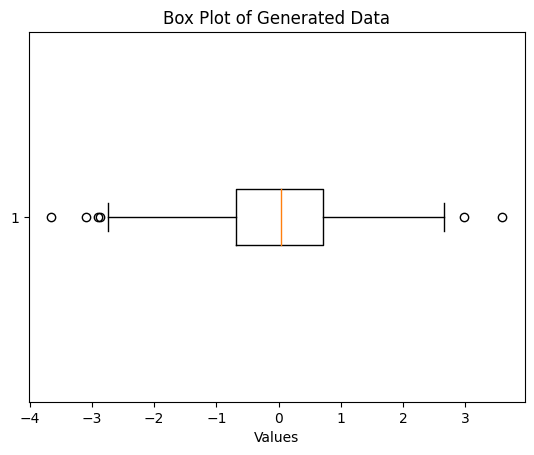

In [ ]:
plt.boxplot(norm_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

Box plots are one way to detect outlier via visualization. All the data points outside the min and max value as depicted in figure can be considered as outlier

**Probability Calculations**

Let's calculate example 4b from chaper 5.
1. P(2 < X < 5)
2. P(X > 0)
3. P(X > -2)

1st

we can write P(2<X<5) = P(X<5) - P(X<2) -- then convert to standard normal distribution and find probability

In [ ]:
st.norm(norm_data_mean,norm_data_standard_deviation).cdf(5) - st.norm(norm_data_mean,norm_data_standard_deviation).cdf(2)

0.026313581830514132

2nd

P(X>0) can be writtten as 1 - P(X<0)

In [ ]:
1 - st.norm(norm_data_mean,norm_data_standard_deviation).cdf(0)

0.5105718178851464

3rd

P(X>-1) can be writtten as 1 - P(X>2) --> 1 - (1 - P(X<2))

In [ ]:
1-st.norm(norm_data_mean,norm_data_standard_deviation).cdf(-2)

0.9767576128745106

*Log normal distribution*

We can generate log nomral distibution with this code of numpy library. We need three arguments for this code to run.
1.   Mean (m)
2.   Standard Deviation (sd)
3.   Number of data to be generated (n)

```
# np.random.lognormal(...)
```



In [ ]:
lg_norm_m = int(input("Enter mean to generate log normal distibution: "))
lg_norm_sd = int(input("Enter standard deviation to generate log normal distibution: "))
lg_norm_n = int(input("Enter number of data to generate with log normal distibution: "))

log_norm_data = np.random.lognormal(lg_norm_m,lg_norm_sd,lg_norm_n)

Enter mean to generate log normal distibution: 0
Enter standard deviation to generate log normal distibution: 1
Enter number of data to generate with log normal distibution: 1000


**Statistical Analysis**

In [ ]:
log_norm_data_mean = np.mean(log_norm_data)
log_norm_data_standard_deviation = np.std(log_norm_data)
log_norm_data_var = np.var(log_norm_data)

log_norm_data_quantile_1,log_norm_data_median,log_norm_data_quantile_3 = np.quantile(log_norm_data, [0.25,0.5,0.75])
log_norm_data_mode = st.mode(log_norm_data)
log_norm_data_kurtosis = st.kurtosis(log_norm_data)
log_norm_data_skewness = st.skew(log_norm_data)

print(f'Mean of given data : {log_norm_data_mean}')
print(f'Standard Deviation of given data : {log_norm_data_standard_deviation}')
print(f'Variance of given data : {log_norm_data_var}')
print(f'First quantile of given data : {log_norm_data_quantile_1}')
print(f'Third quantile of given data : {log_norm_data_quantile_3}')
print(f'Second quantile or Median of given data : {log_norm_data_median}')
print(f'Mode of given data : {log_norm_data_mode.mode}')
print(f'Kurtosis of given data : {log_norm_data_kurtosis}')
print(f'Skewness of given data : {log_norm_data_skewness}')


Mean of given data : 1.6869295726786464
Standard Deviation of given data : 2.2540959660426383
Variance of given data : 5.080948624129696
First quantile of given data : 0.48623663358144686
Third quantile of given data : 1.9867152490531423
Second quantile or Median of given data : 1.0188046647825384
Mode of given data : 0.04250272924896509
Kurtosis of given data : 25.292649040397166
Skewness of given data : 4.238777218650358


The first quantile says that 25 percent of the distribution values falls below 0.48

The second-quantile says that 50 percent of the distribution values falls below 1.01

The third quartile represents that 75 percent of the data falls below 1.98

Skewness value is 4.23 which perfectly align with characteristic of log normal distribution.

Kurtosis is 25.29 which represent data have heavy tails and also have number of outliers.

**Visualization**

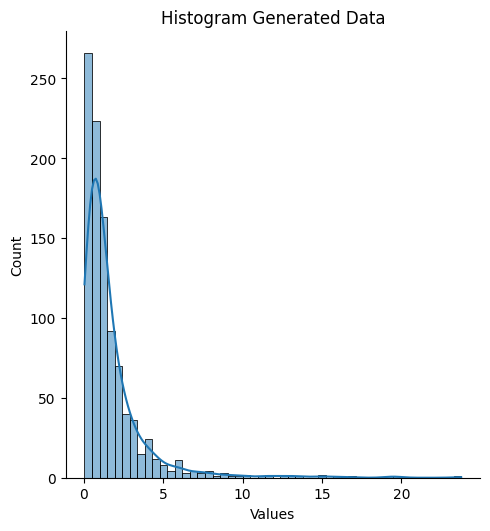

In [ ]:
bins = 50

ax = sns.displot(log_norm_data,kde=True,bins=bins)
ax.set(xlabel='Values')
plt.title('Histogram Generated Data')
plt.show()

Represent skewed distribution and heavy tail with lots of outliers.

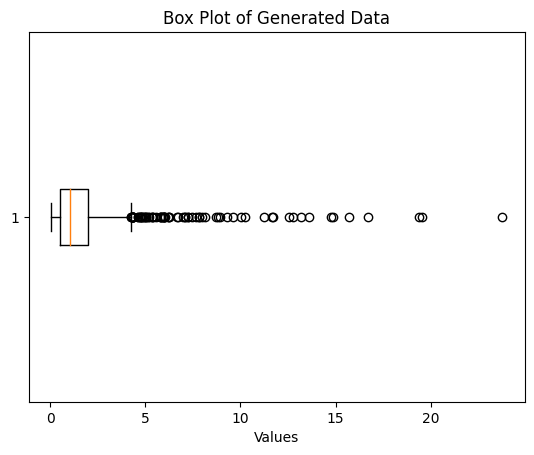

In [ ]:
plt.boxplot(log_norm_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

**Central Limit Theorem Verification**

In [ ]:
log_norm_sample = np.random.choice(log_norm_data, size=50, replace=False)
log_norm_sample

array([ 0.39228146,  0.05977492,  0.40392665, 10.00891928,  0.90142956,
        1.41032242,  0.61742599,  1.41647004,  2.05229873,  1.27913045,
        1.52943037,  0.76108008,  0.91501755,  1.08419107,  0.86298465,
        1.83119754,  0.23021473,  0.20313499,  0.28159532,  5.79624532,
        1.57865178,  5.79506788,  1.12979941,  1.69474442,  0.4514296 ,
        0.23542105,  0.72023084,  0.32671536,  4.31404835,  0.75580987,
        0.94591435,  0.47967254,  1.50206268,  4.14692312,  0.55804432,
        1.47318602,  0.35514706, 11.6363017 ,  0.97152134,  1.19507334,
       13.6293081 ,  0.64310333, 10.24975534,  0.73487855,  0.96452552,
        0.20607753,  2.94571322,  5.96261694,  1.31175238,  1.03924911])

In [ ]:
log_norm_sample.mean()

2.1997963228773494

**Verification for central limit theorem for 1000 samples of size 10.**

In [ ]:
calculated_means_of_sample_log_norm_1 = []
no_of_sample = 1000
sample_size = 10
for i in range(no_of_sample):
  ith_sample = np.random.choice(log_norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_log_norm_1.append(ith_sample_mean)

calculated_means_of_sample_log_norm_1 = np.array(calculated_means_of_sample_log_norm_1)

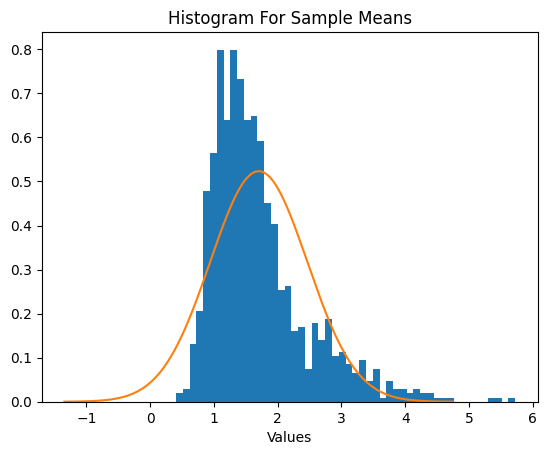

In [ ]:
bins = 50
plt.hist(calculated_means_of_sample_log_norm_1, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_log_norm_1.mean()-4*calculated_means_of_sample_log_norm_1.std(),calculated_means_of_sample_log_norm_1.mean()+4*calculated_means_of_sample_log_norm_1.std(),lg_norm_n)
y = st.norm(loc=calculated_means_of_sample_log_norm_1.mean(),scale=calculated_means_of_sample_log_norm_1.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

**Verification for central limit theorem for 1000 samples of size 30.**

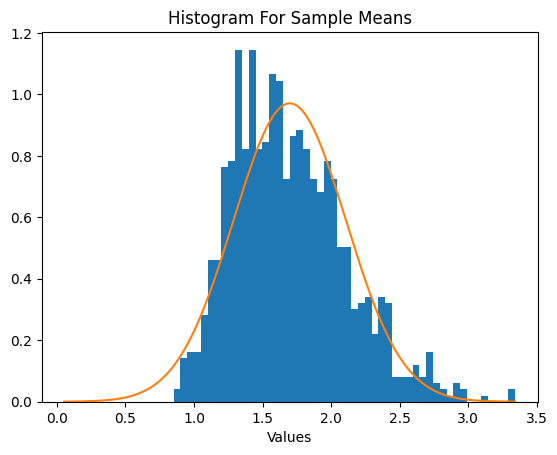

In [ ]:
calculated_means_of_sample_log_norm_2 = []
no_of_sample = 1000
sample_size = 30
for i in range(no_of_sample):
  ith_sample = np.random.choice(log_norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_log_norm_2.append(ith_sample_mean)

calculated_means_of_sample_log_norm_2 = np.array(calculated_means_of_sample_log_norm_2)

bins = 50
plt.hist(calculated_means_of_sample_log_norm_2, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_log_norm_2.mean()-4*calculated_means_of_sample_log_norm_2.std(),calculated_means_of_sample_log_norm_2.mean()+4*calculated_means_of_sample_log_norm_2.std(),lg_norm_n)
y = st.norm(loc=calculated_means_of_sample_log_norm_2.mean(),scale=calculated_means_of_sample_log_norm_2.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

**Verification for central limit theorem for 1000 samples of size 50.**

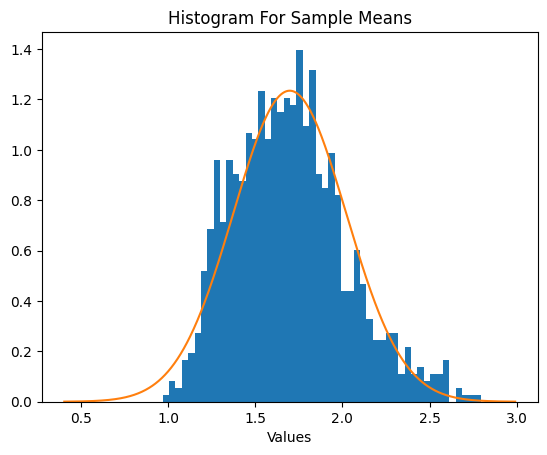

In [ ]:
calculated_means_of_sample_log_norm_3 = []
no_of_sample = 1000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(log_norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_log_norm_3.append(ith_sample_mean)

calculated_means_of_sample_log_norm_3 = np.array(calculated_means_of_sample_log_norm_3)

bins = 50
plt.hist(calculated_means_of_sample_log_norm_3, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_log_norm_3.mean()-4*calculated_means_of_sample_log_norm_3.std(),calculated_means_of_sample_log_norm_3.mean()+4*calculated_means_of_sample_log_norm_3.std(),lg_norm_n)
y = st.norm(loc=calculated_means_of_sample_log_norm_3.mean(),scale=calculated_means_of_sample_log_norm_3.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 3000 samples of size 40.

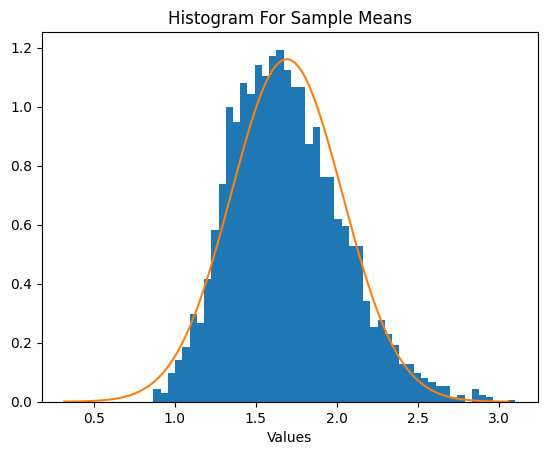

In [ ]:
calculated_means_of_sample_log_norm_3 = []
no_of_sample = 3000
sample_size = 40
for i in range(no_of_sample):
  ith_sample = np.random.choice(log_norm_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_log_norm_3.append(ith_sample_mean)

calculated_means_of_sample_log_norm_3 = np.array(calculated_means_of_sample_log_norm_3)

bins = 50
plt.hist(calculated_means_of_sample_log_norm_3, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_log_norm_3.mean()-4*calculated_means_of_sample_log_norm_3.std(),calculated_means_of_sample_log_norm_3.mean()+4*calculated_means_of_sample_log_norm_3.std(),lg_norm_n)
y = st.norm(loc=calculated_means_of_sample_log_norm_3.mean(),scale=calculated_means_of_sample_log_norm_3.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

It can be observed that with increse in sample size the bell curve become more sharper.

**Outlier Detection**

Outlier Detection with standard deviation

In [ ]:
norm_data_higher_bound = log_norm_data_mean + 3*log_norm_data_standard_deviation
norm_data_higher_bound

8.44921747080656

In [ ]:
norm_data_lower_bound = log_norm_data_mean - 3*log_norm_data_standard_deviation
norm_data_lower_bound

-5.075358325449269

In [ ]:
norm_data_outliers = []
for data_point in log_norm_data:
  if data_point > norm_data_higher_bound:
    norm_data_outliers.append(data_point)
  if data_point <  norm_data_lower_bound:
    norm_data_outliers.append(data_point)

norm_data_outliers

[11.636301699259395,
 9.279948871703278,
 15.717712230351143,
 12.773457192090275,
 19.40269969487415,
 14.880063853950025,
 11.22163468607585,
 14.75533751919084,
 8.705585815737308,
 11.725076096865672,
 8.80102529394565,
 19.5629064296877,
 12.538741517566681,
 16.692335743401525,
 13.179904706691643,
 10.249755343711538,
 13.62930809622201,
 9.6001715965004,
 10.008919276144425,
 8.909238214013067,
 23.75672646811131]

Outlier Detection with z - score

In [ ]:
norm_data_outliers_z_score = []
for data_point in log_norm_data:
  z_score = (data_point - log_norm_data_mean)/log_norm_data_standard_deviation
  if z_score > 3:
    norm_data_outliers_z_score.append(data_point)
  if z_score <  -3:
    norm_data_outliers_z_score.append(data_point)

norm_data_outliers_z_score

[11.636301699259395,
 9.279948871703278,
 15.717712230351143,
 12.773457192090275,
 19.40269969487415,
 14.880063853950025,
 11.22163468607585,
 14.75533751919084,
 8.705585815737308,
 11.725076096865672,
 8.80102529394565,
 19.5629064296877,
 12.538741517566681,
 16.692335743401525,
 13.179904706691643,
 10.249755343711538,
 13.62930809622201,
 9.6001715965004,
 10.008919276144425,
 8.909238214013067,
 23.75672646811131]

Outlier Detection with IQR

In [ ]:
log_norm_Inter_quantile_range = log_norm_data_quantile_3 - log_norm_data_quantile_1
print("Inter Quartile Range : ", log_norm_Inter_quantile_range)

Inter Quartile Range :  1.5004786154716956


In [ ]:
IQR_upper_bound_log_norm = log_norm_data_quantile_3 + 1.5 * log_norm_Inter_quantile_range
IQR_upper_bound_log_norm

4.237433172260685

In [ ]:
IQR_lower_bound_log_norm = log_norm_data_quantile_1 - 1.5 * log_norm_Inter_quantile_range
IQR_lower_bound_log_norm

-1.7644812896260964

In [ ]:
norm_data_outliers_IQR = []
for data_point in log_norm_data:
  if data_point > IQR_upper_bound_log_norm:
    norm_data_outliers_IQR.append(data_point)
  if data_point <  IQR_lower_bound_log_norm:
    norm_data_outliers_IQR.append(data_point)

norm_data_outliers_IQR

[4.347468483294571,
 4.8315737020300205,
 5.962013389825085,
 5.196206632781405,
 11.636301699259395,
 4.241443061793827,
 9.279948871703278,
 15.717712230351143,
 12.773457192090275,
 5.962616942664356,
 19.40269969487415,
 4.2657827421574,
 14.880063853950025,
 5.401981074810151,
 11.22163468607585,
 6.165788220246831,
 4.314048349722379,
 4.624739503820592,
 14.75533751919084,
 8.705585815737308,
 7.832640301500471,
 4.781931753218382,
 4.27418818539469,
 5.755734926370346,
 6.019079982410035,
 11.725076096865672,
 5.808474875999178,
 5.539985036539016,
 4.3446346039031924,
 8.80102529394565,
 5.008327942465908,
 5.795067879948899,
 19.5629064296877,
 6.730971743712163,
 6.267153175131855,
 5.930376211111948,
 12.538741517566681,
 4.720286229010522,
 4.9770522888731135,
 5.362002149307479,
 5.936432833454981,
 16.692335743401525,
 4.9027634603090515,
 13.179904706691643,
 8.12934488583099,
 4.2741488973900434,
 7.0873170528268385,
 10.249755343711538,
 8.00137801453187,
 7.104759731

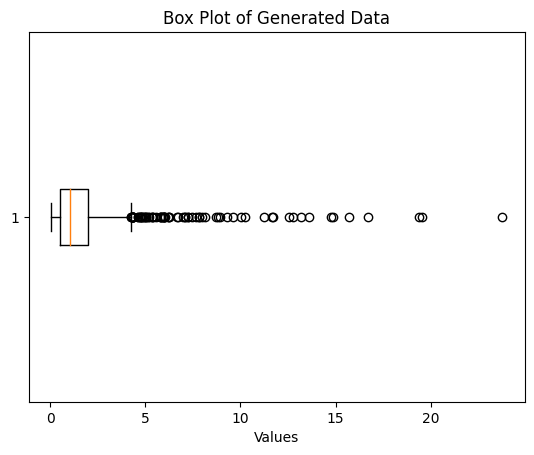

In [ ]:
plt.boxplot(log_norm_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

all the data points outside the min and max value as depicted in figure can be considered as outlier

Let's calculate example 4b from chaper 5.
1. P(0.7 < X < 3.5)
2. P(X > 9)

1st

we can write P(0.7<X<3.5) = P(X<3.5) - P(X<0.7) -- then convert to standard normal distribution and find probability

In [ ]:
st.lognorm(log_norm_data_mean,log_norm_data_standard_deviation).cdf(3.5) - st.lognorm(log_norm_data_mean,log_norm_data_standard_deviation).cdf(0.7)

0.5518482337899968

2nd

P(X>9) can be writtten as 1 - P(X<9)

In [ ]:
1 - st.lognorm(log_norm_data_mean,log_norm_data_standard_deviation).cdf(9)

0.1289005712444271

**Simulating from Discrete Distributions**

***Bernoulli Distribution***

A Bernoulli distribution is a special case of the binomial distribution, where the number of trials(n) is fixed at one. So, to generate data following bernoulli distribution we can use below funtion of numpy library.

1.   Number of trials (n)
2.   Probability of success (p)
3.   Number of data to be generated (size)

```
# np.random.binomial(...)
```
NOTE: As mentioned above we are n=1 with binomial distribution to generate data for bernoulli distribution.



In [ ]:
bernoulli_p = float(input("Enter probability of success to generate bernoulli distibution: "))
bernoulli_size = int(input("Enter number of data to generate with bernoulli distibution: "))

bernoulli_data = np.random.binomial(1,bernoulli_p,bernoulli_size)

Enter probability of success to generate bernoulli distibution: 0.35
Enter number of data to generate with bernoulli distibution: 1000


**Statistical Analysis**

In [ ]:
bernoulli_data_mean = np.mean(bernoulli_data)
bernoulli_data_standard_deviation = np.std(bernoulli_data)
bernoulli_data_var = np.var(bernoulli_data)

bernoulli_data_quantile_1,bernoulli_data_median,bernoulli_data_quantile_3 = np.quantile(bernoulli_data, [0.25,0.5,0.75])
bernoulli_data_mode = st.mode(bernoulli_data)
bernoulli_data_kurtosis = st.kurtosis(bernoulli_data)
bernoulli_data_skewness = st.skew(bernoulli_data)

print(f'Mean of given data : {bernoulli_data_mean}')
print(f'Standard Deviation of given data : {bernoulli_data_standard_deviation}')
print(f'Variance of given data : {bernoulli_data_var}')
print(f'First quantile of given data : {bernoulli_data_quantile_1}')
print(f'Third quantile of given data : {bernoulli_data_quantile_3}')
print(f'Second quantile or Median of given data : {bernoulli_data_median}')
print(f'Mode of given data : {bernoulli_data_mode.mode}')
print(f'Kurtosis of given data : {bernoulli_data_kurtosis}')
print(f'Skewness of given data : {bernoulli_data_skewness}')

Mean of given data : 0.35
Standard Deviation of given data : 0.47696960070847283
Variance of given data : 0.2275
First quantile of given data : 0.0
Third quantile of given data : 1.0
Second quantile or Median of given data : 0.0
Mode of given data : 0
Kurtosis of given data : -1.6043956043956045
Skewness of given data : 0.6289709020331512


We only have two values [0,1] in bernoulli distribution which we can verify with our output of first quantile of given data and
third quantile of given data which are 0 and 1 respectively.

**Visualization**

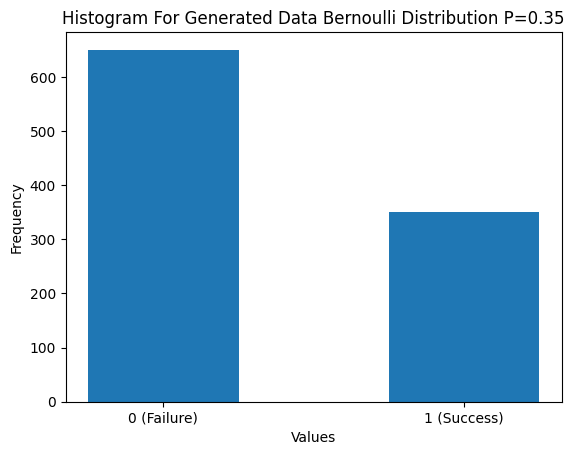

In [ ]:
bins = [-0.5, 0.5, 1.5]
plt.hist(bernoulli_data, bins=[-0.5, 0.5, 1.5],align='mid',rwidth=0.5)
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title(f'Histogram For Generated Data Bernoulli Distribution P={bernoulli_p}')
plt.show()

Only 2 bar in bar chart because we either have success or failure in this distribution.

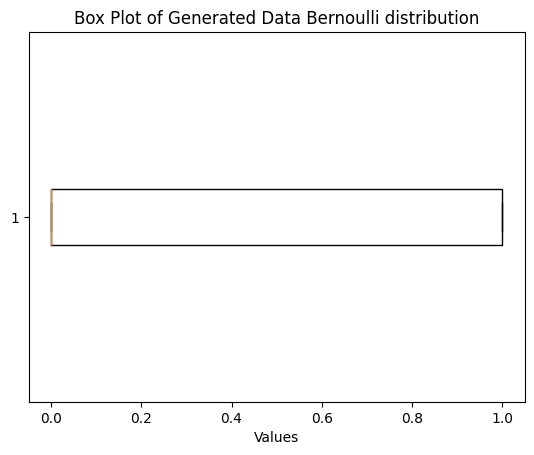

In [ ]:
plt.boxplot(bernoulli_data, vert=False)
plt.title('Box Plot of Generated Data Bernoulli distribution')
plt.xlabel('Values')
plt.show()

There is no outlier and it make sense because output of event will be 1 or 0 not any other value like 1.5 which is nither success nor failure.

**Central Limit Theorem Verification**

In [ ]:
bernoulli_sample = np.random.choice(bernoulli_data, size=50, replace=False)
bernoulli_sample

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [ ]:
bernoulli_sample.mean()

0.32

Verification for central limit theorem for 1000 samples of size 10.

In [ ]:
calculated_means_of_sample_bernoulli = []
no_of_sample = 1000
sample_size = 10
for i in range(no_of_sample):
  ith_sample = np.random.choice(bernoulli_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_bernoulli.append(ith_sample_mean)

calculated_means_of_sample_bernoulli = np.array(calculated_means_of_sample_bernoulli)

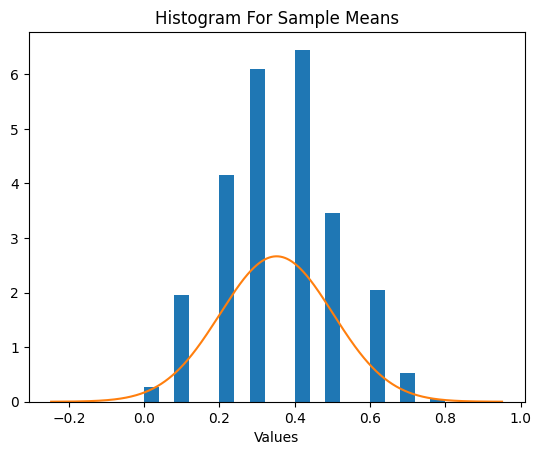

In [ ]:
bins = 20
plt.hist(calculated_means_of_sample_bernoulli, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_bernoulli.mean()-4*calculated_means_of_sample_bernoulli.std(),calculated_means_of_sample_bernoulli.mean()+4*calculated_means_of_sample_bernoulli.std(),n)
y = st.norm(loc=calculated_means_of_sample_bernoulli.mean(),scale=calculated_means_of_sample_bernoulli.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 30.

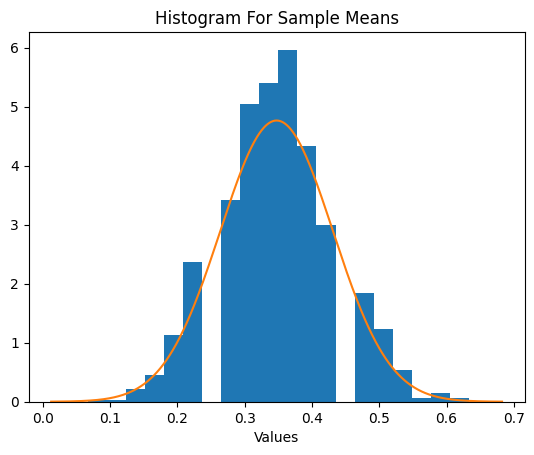

In [ ]:
calculated_means_of_sample_bernoulli = []
no_of_sample = 1000
sample_size = 30
for i in range(no_of_sample):
  ith_sample = np.random.choice(bernoulli_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_bernoulli.append(ith_sample_mean)

calculated_means_of_sample_bernoulli = np.array(calculated_means_of_sample_bernoulli)

bins = 20
plt.hist(calculated_means_of_sample_bernoulli, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_bernoulli.mean()-4*calculated_means_of_sample_bernoulli.std(),calculated_means_of_sample_bernoulli.mean()+4*calculated_means_of_sample_bernoulli.std(),n)
y = st.norm(loc=calculated_means_of_sample_bernoulli.mean(),scale=calculated_means_of_sample_bernoulli.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 50.

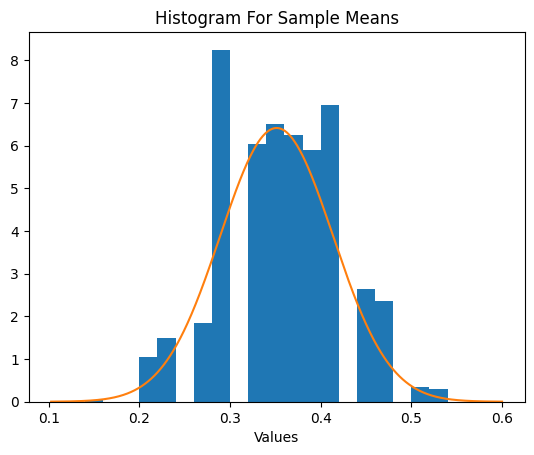

In [ ]:
calculated_means_of_sample_bernoulli = []
no_of_sample = 1000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(bernoulli_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_bernoulli.append(ith_sample_mean)

calculated_means_of_sample_bernoulli = np.array(calculated_means_of_sample_bernoulli)

bins = 20
plt.hist(calculated_means_of_sample_bernoulli, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_bernoulli.mean()-4*calculated_means_of_sample_bernoulli.std(),calculated_means_of_sample_bernoulli.mean()+4*calculated_means_of_sample_bernoulli.std(),n)
y = st.norm(loc=calculated_means_of_sample_bernoulli.mean(),scale=calculated_means_of_sample_bernoulli.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 3000 samples of size 50.

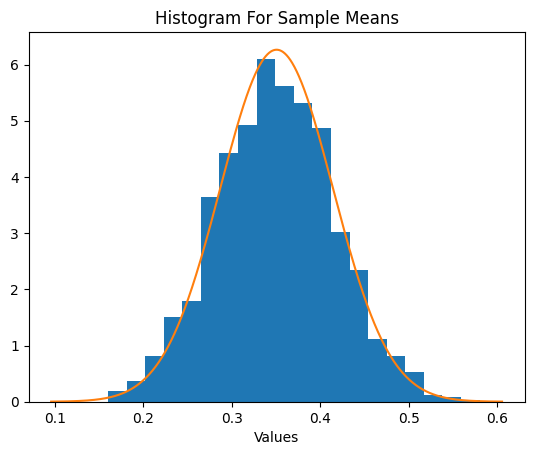

In [ ]:
calculated_means_of_sample_bernoulli = []
no_of_sample = 3000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(bernoulli_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_bernoulli.append(ith_sample_mean)

calculated_means_of_sample_bernoulli = np.array(calculated_means_of_sample_bernoulli)

bins = 20
plt.hist(calculated_means_of_sample_bernoulli, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_bernoulli.mean()-4*calculated_means_of_sample_bernoulli.std(),calculated_means_of_sample_bernoulli.mean()+4*calculated_means_of_sample_bernoulli.std(),n)
y = st.norm(loc=calculated_means_of_sample_bernoulli.mean(),scale=calculated_means_of_sample_bernoulli.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

It can be observed that with increse in sample size the bell curve become more sharper.

**Outlier Detection**

Outlier Detection with standard deviation

In [ ]:
higher_bound_bernoulli = bernoulli_data_mean + 3*bernoulli_data_standard_deviation
higher_bound_bernoulli

1.7809088021254187

In [ ]:
lower_bound_bernoulli = bernoulli_data_mean - 3*bernoulli_data_standard_deviation
lower_bound_bernoulli

-1.0809088021254185

In [ ]:
outliers = []
for data_point in bernoulli_data:
  if data_point > higher_bound_bernoulli:
    outliers.append(data_point)
  if data_point <  lower_bound_bernoulli:
    outliers.append(data_point)

outliers

[]

Outlier Detection with IQR

In [ ]:
Inter_quantile_range_bernoulli = bernoulli_data_quantile_3 - bernoulli_data_quantile_1
print("Inter Quartile Range : ", Inter_quantile_range_bernoulli)

Inter Quartile Range :  1.0


In [ ]:
IQR_upper_bound_bernoulli = bernoulli_data_quantile_3 + 1.5 * Inter_quantile_range_bernoulli
IQR_upper_bound_bernoulli

2.5

In [ ]:
IQR_lower_bound_bernoulli = bernoulli_data_quantile_1 - 1.5 * Inter_quantile_range_bernoulli
IQR_lower_bound_bernoulli

-1.5

In [ ]:
outliers = []
for data_point in bernoulli_data:
  if data_point > IQR_upper_bound_bernoulli:
    outliers.append(data_point)
  if data_point <  IQR_lower_bound_bernoulli:
    outliers.append(data_point)

outliers

[]

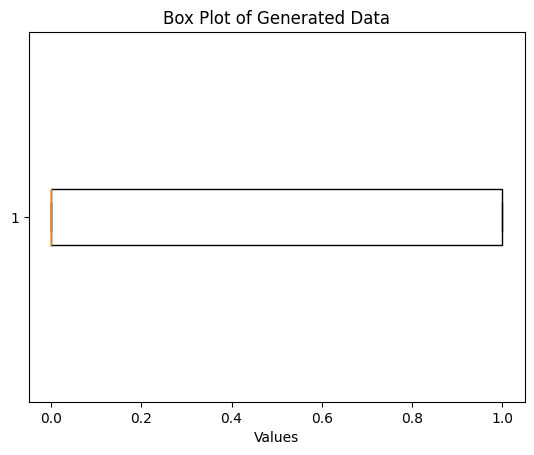

In [ ]:
plt.boxplot(bernoulli_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

**Probability Calculations**

example:
One biased coin flipped with the probability of getting head 0.4. If getting head is success find probability of getting tails.

Suppose, X be the random variable denote flipping coin results in head.

* P(X = 1) (getting head as result)
* P(X = 0) (getting tail as result)

P(X = 1) = (p^x) * (1 - p)^(1-x)

In [ ]:
st.bernoulli(p=0.3).pmf(1)

0.3

P(X = 0) = (p^x) * (1 - p)^(1-x)

In [ ]:
st.bernoulli(p=0.3).pmf(0)

0.7000000000000002

***Binomial Distribution***

So, to generate data following bunomial distribution we can use below funtion of numpy library.

1.   Number of trials (n)
2.   Probability of success (p)
3.   Number of data to be generated (size)

```
# np.random.binomial(...)
```



In [ ]:
binomial_n = float(input("Enter number of trials to generate binomial distibution: "))
binomial_p = float(input("Enter probability of success to generate binomial distibution: "))
binomial_size = int(input("Enter number of data to generate with binomial distibution: "))

binomial_data = np.random.binomial(binomial_n,binomial_p,binomial_size)

Enter number of trials to generate binomial distibution: 25
Enter probability of success to generate binomial distibution: 0.65
Enter number of data to generate with binomial distibution: 1000


**Statistical Analysis**

In [ ]:
binomial_data_mean = np.mean(binomial_data)
binomial_data_standard_deviation = np.std(binomial_data)
binomial_data_var = np.var(binomial_data)

binomial_data_quantile_1,binomial_data_median,binomial_data_quantile_3 = np.quantile(binomial_data, [0.25,0.5,0.75])
binomial_data_mode = st.mode(binomial_data)
binomial_data_kurtosis = st.kurtosis(binomial_data)
binomial_data_skewness = st.skew(binomial_data)

print(f'Mean of given data : {binomial_data_mean}')
print(f'Standard Deviation of given data : {binomial_data_standard_deviation}')
print(f'Variance of given data : {binomial_data_var}')
print(f'First quantile of given data : {binomial_data_quantile_1}')
print(f'Third quantile of given data : {binomial_data_quantile_3}')
print(f'Second quantile or Median of given data : {binomial_data_median}')
print(f'Mode of given data : {binomial_data_mode.mode}')
print(f'Kurtosis of given data : {binomial_data_kurtosis}')
print(f'Skewness of given data : {binomial_data_skewness}')

Mean of given data : 16.317
Standard Deviation of given data : 2.455709877000946
Variance of given data : 6.030511
First quantile of given data : 15.0
Third quantile of given data : 18.0
Second quantile or Median of given data : 16.0
Mode of given data : 17
Kurtosis of given data : -0.12083556310987698
Skewness of given data : -0.07507981985580446


The first quantile says that 25 percent of the distribution values falls below 15

The second-quantile says that 50 percent of the distribution values falls below 16

The third quartile represents that 75 percent of the data falls below 18

Skewness values is -0.07 which indicate that data is little bit skewed. Kurtosis is almost 0 so it represents no long tails.

**Visualization**

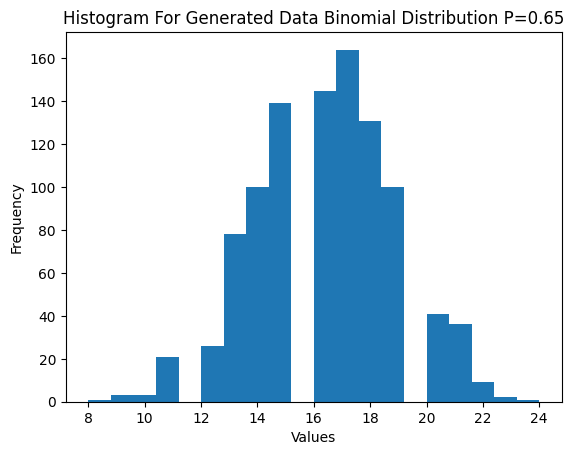

In [ ]:
plt.hist(binomial_data, bins=20,align='mid')
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title(f'Histogram For Generated Data Binomial Distribution P={binomial_p}')
plt.show()

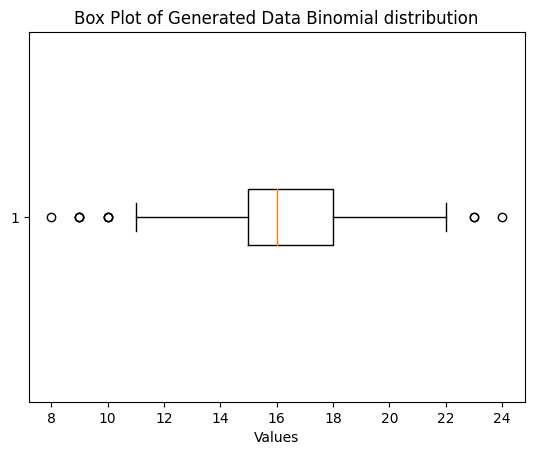

In [ ]:
plt.boxplot(binomial_data, vert=False)
plt.title('Box Plot of Generated Data Binomial distribution')
plt.xlabel('Values')
plt.show()

**Central Limit Theorem Verification**

In [ ]:
binomial_sample = np.random.choice(binomial_data, size=50, replace=False)
binomial_sample

array([19, 11, 16, 17, 14, 17, 17, 18, 16, 20, 14, 18, 13, 18, 15, 16, 18,
       13, 16, 14, 17, 21, 13, 14, 15, 19, 19, 15, 14, 14, 20, 15, 15, 12,
       21, 17, 13, 15, 14, 21, 16, 19, 17, 13, 13, 18, 19, 18, 21, 17])

In [ ]:
binomial_sample.mean()

16.3

Verification for central limit theorem for 1000 samples of size 10.

In [ ]:
calculated_means_of_sample_binomial = []
no_of_sample = 1000
sample_size = 10
for i in range(no_of_sample):
  ith_sample = np.random.choice(binomial_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_binomial.append(ith_sample_mean)

calculated_means_of_sample_binomial = np.array(calculated_means_of_sample_binomial)

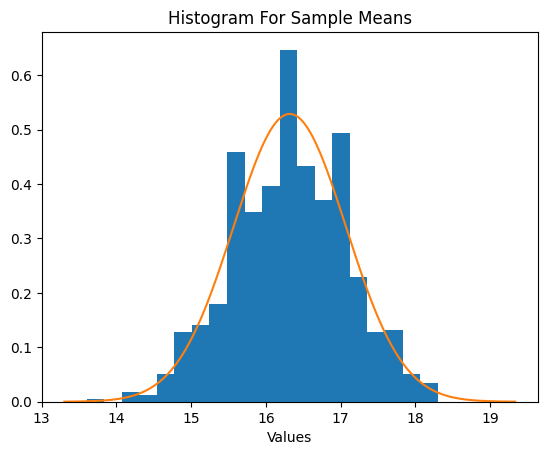

In [ ]:
bins = 20
plt.hist(calculated_means_of_sample_binomial, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_binomial.mean()-4*calculated_means_of_sample_binomial.std(),calculated_means_of_sample_binomial.mean()+4*calculated_means_of_sample_binomial.std(),n)
y = st.norm(loc=calculated_means_of_sample_binomial.mean(),scale=calculated_means_of_sample_binomial.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 30.

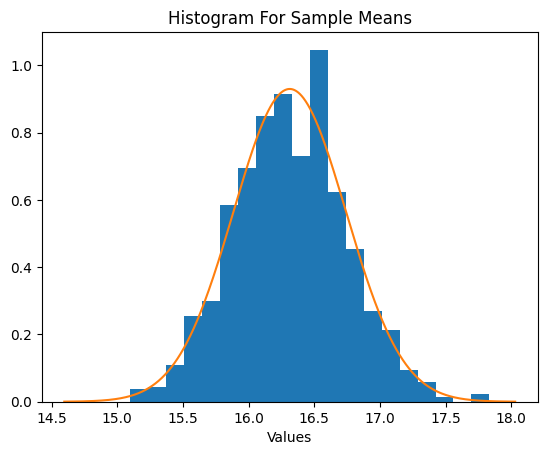

In [ ]:
calculated_means_of_sample_binomial = []
no_of_sample = 1000
sample_size = 30
for i in range(no_of_sample):
  ith_sample = np.random.choice(binomial_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_binomial.append(ith_sample_mean)

calculated_means_of_sample_binomial = np.array(calculated_means_of_sample_binomial)

bins = 20
plt.hist(calculated_means_of_sample_binomial, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_binomial.mean()-4*calculated_means_of_sample_binomial.std(),calculated_means_of_sample_binomial.mean()+4*calculated_means_of_sample_binomial.std(),n)
y = st.norm(loc=calculated_means_of_sample_binomial.mean(),scale=calculated_means_of_sample_binomial.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 1000 samples of size 50.

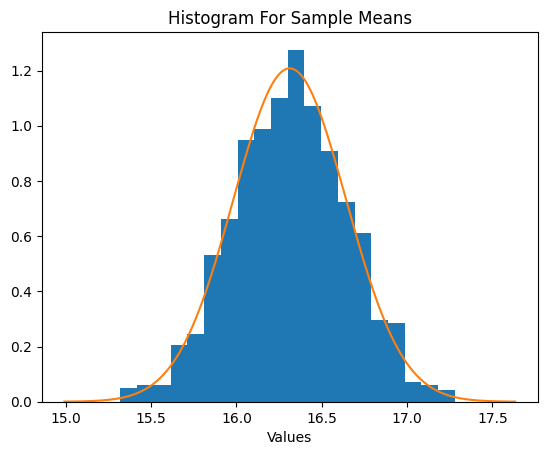

In [ ]:
calculated_means_of_sample_binomial = []
no_of_sample = 1000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(binomial_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_binomial.append(ith_sample_mean)

calculated_means_of_sample_binomial = np.array(calculated_means_of_sample_binomial)

bins = 20
plt.hist(calculated_means_of_sample_binomial, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_binomial.mean()-4*calculated_means_of_sample_binomial.std(),calculated_means_of_sample_binomial.mean()+4*calculated_means_of_sample_binomial.std(),n)
y = st.norm(loc=calculated_means_of_sample_binomial.mean(),scale=calculated_means_of_sample_binomial.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

Verification for central limit theorem for 3000 samples of size 50.

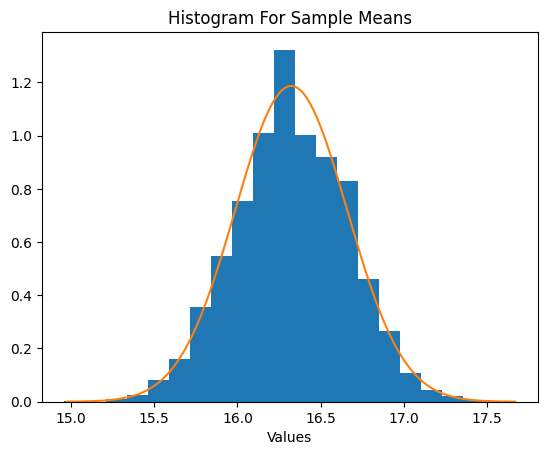

In [ ]:
calculated_means_of_sample_binomial = []
no_of_sample = 3000
sample_size = 50
for i in range(no_of_sample):
  ith_sample = np.random.choice(binomial_data, size=sample_size, replace=False)
  ith_sample_mean = ith_sample.mean()
  calculated_means_of_sample_binomial.append(ith_sample_mean)

calculated_means_of_sample_binomial = np.array(calculated_means_of_sample_binomial)

bins = 20
plt.hist(calculated_means_of_sample_binomial, bins, density=True)
range_x = np.linspace(calculated_means_of_sample_binomial.mean()-4*calculated_means_of_sample_binomial.std(),calculated_means_of_sample_binomial.mean()+4*calculated_means_of_sample_binomial.std(),n)
y = st.norm(loc=calculated_means_of_sample_binomial.mean(),scale=calculated_means_of_sample_binomial.std()).pdf(range_x)
plt.plot(range_x,y)
plt.xlabel('Values')
plt.title('Histogram For Sample Means')
plt.show()

It can be observed that with increse in sample size the bell curve become more sharper.

**Outlier Detection**

Outlier Detection with standard deviation

In [ ]:
higher_bound_binomial = binomial_data_mean + 3*binomial_data_standard_deviation
higher_bound_binomial

23.68412963100284

In [ ]:
lower_bound_binomial = binomial_data_mean - 3*binomial_data_standard_deviation
lower_bound_binomial

8.949870368997162

In [ ]:
outliers = []
for data_point in binomial_data:
  if data_point > higher_bound_binomial:
    outliers.append(data_point)
  if data_point <  lower_bound_binomial:
    outliers.append(data_point)

outliers

[8, 24]

Outlier Detection with IQR

In [ ]:
Inter_quantile_range_binomial = binomial_data_quantile_3 - binomial_data_quantile_1
print("Inter Quartile Range : ", Inter_quantile_range_binomial)

Inter Quartile Range :  3.0


In [ ]:
IQR_upper_bound_binomial = binomial_data_quantile_3 + 1.5 * Inter_quantile_range_binomial
IQR_upper_bound_binomial

22.5

In [ ]:
IQR_lower_bound_binomial = binomial_data_quantile_1 - 1.5 * Inter_quantile_range_binomial
IQR_lower_bound_binomial

10.5

In [ ]:
outliers = []
for data_point in binomial_data:
  if data_point > IQR_upper_bound_binomial:
    outliers.append(data_point)
  if data_point <  IQR_lower_bound_binomial:
    outliers.append(data_point)

outliers

[9, 9, 23, 8, 10, 9, 24, 10, 23, 10]

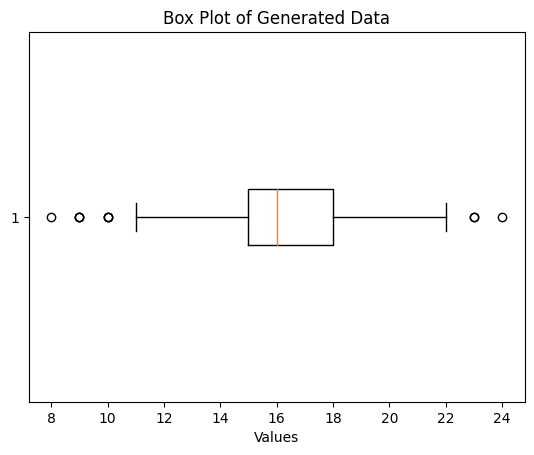

In [ ]:
plt.boxplot(binomial_data, vert=False)
plt.title('Box Plot of Generated Data')
plt.xlabel('Values')
plt.show()

**Probability Calculations**

* P(X >= 2)
* P(X = 4)

In [ ]:
1 - st.binom(n=binomial_n,p=binomial_p).pmf(0) - st.binom(n=binomial_n,p=binomial_p).pmf(1)

0.9999999998104424

In [ ]:
st.binom(n=binomial_n,p=binomial_p).pmf(4)

6.014130996604124e-07

## **Markov Chain**

*Markov chain:* A Markov chain is a stochastic model that outlines the probability associated with a sequence of events occurring based on the state in the previous event not on past sequence of events.

**Markov Chain Simulation:** Let's take example scenario to build markov chain based on that.

Hypothetical Scenario:
* Assume there is a cafe named "Mojila Cafe".
* This cafe serve 3 different items **pasta, tacos and burito**.
* Note: Cafe sell only one item per day.
* The menu for next day depends on the menu of current day.
* From now onwards we will call each day's menu a state. (eg: pasta as a menu on given day is a state)
* Specific probabilities are associated to go from one state to another or for transition between any two states. (eg: probability that next day's menu will be pasta if today's menu is tacos is 0.4)

Encoding of each state for simplicity

In [ ]:
encoded_states = {
    0 : "Pasta",
    1 : "Tacos",
    2 : "Burito"
}
encoded_states

{0: 'Pasta', 1: 'Tacos', 2: 'Burito'}

Simulated a random transition matrix for given three states.
* For the given problem we will have 3*3 matrix as we have three states.
* Suppose, i = Row and j = Column then A[i,j] (jth element in ith row) represents transition probabilities to go from state i to state j.

In [ ]:
X = np.array(
    [
        [0.35, 0.4, 0.25],
        [0.65, 0.2, 0.15],
        [0.19, 0.61, 0.2]
    ])
X

array([[0.35, 0.4 , 0.25],
       [0.65, 0.2 , 0.15],
       [0.19, 0.61, 0.2 ]])

Random sequence generation using Random Walk based on above transition matrix.

In [ ]:
n = 15
initial_state = 0
current_state = initial_state
print(encoded_states[current_state], "--->", end=" ")

while n-1:
    current_state = np.random.choice([0, 1, 2], p=X[current_state])
    print(encoded_states[current_state], "--->", end=" ")
    n-=1
print("stop")

Pasta ---> Pasta ---> Pasta ---> Pasta ---> Burito ---> Tacos ---> Pasta ---> Pasta ---> Tacos ---> Pasta ---> Pasta ---> Tacos ---> Pasta ---> Tacos ---> Pasta ---> stop


Above we show example of only 15 steps from inital steps. If we increase number of steps to infinity then this markov chain converge to the steady state means after infinity steps the probabilities of going one state to another does not change.
* This steady state of markov chain also known as stationary distribution or equilibrium state.
* There are multiple ways to find this steady state probabilities. e.g. Monte Carlo, Repeated Matrix Multiplication and Eigen Decomposition etc.
* Let's use simple and efficient way using linear algebra to find steady state probabilities. if we find x for  λ=1 for this equation Ax =  λx, x will represent steady state.

In [ ]:
def calculate_steady_state(epochs, initial_state_vector):
  t_m = X
  next_step_probabilities = np.matmul(initial_state_vector,t_m)
  for i in range(epochs):
    next_step_probabilities = next_step_probabilities.dot(t_m)

  print("Steady State Probabilities", next_step_probabilities)
  return next_step_probabilities

In [ ]:
list_epochs = [1,2,3,5,8,10,100,1000]

for i in list_epochs:
  calculate_steady_state(i,initial_state_vector = [0,1,0])

Steady State Probabilities [0.386  0.3915 0.2225]
Steady State Probabilities [0.43185  0.368425 0.199725]
Steady State Probabilities [0.4285715  0.36825725 0.20317125]
Steady State Probabilities [0.42822184 0.3688304  0.20294776]
Steady State Probabilities [0.42818131 0.3688523  0.20296639]
Steady State Probabilities [0.42818111 0.36885246 0.20296643]
Steady State Probabilities [0.42818111 0.36885246 0.20296643]
Steady State Probabilities [0.42818111 0.36885246 0.20296643]


## **Recurrent events in markvo chain**

**Recurrent state:** Any state **i** in markov chain is said to be recurrent if one can go wherever from state **i** and there is always a path back to state **i**.

**Transient state:** If state is not recurrent, it is transient state. Means, one can go to other state from state **i**, but here is no path to go back to state **i**.

* If we have atleast one transient state in markov chain then that markov chain is said to be **reducible** markov chain, mean we can divid that markov chain to number of **irreducible** markov chain.

In [ ]:
#let's take example of gambler's ruin markvo chain
markov_x = np.array(
    [
        [1.0, 0.0, 0.0, 0.0],
        [0.5, 0.0, 0.5, 0.0],
        [0.0, 0.5, 0.0, 0.5],
        [0.0, 0.0, 0.0, 1.0]
    ])
markov_x

array([[1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. ]])

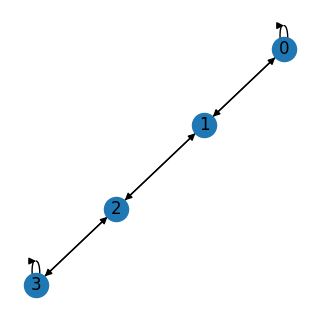

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
graph = nx.DiGraph(nx.from_numpy_array(markov_x))
nx.draw(graph, with_labels=True)
plt.show()

Let's start Random walk of 15 steps from each state and analyze transient and recurrent state.

In [ ]:
initial_state = [0,1,2,3]

for start in initial_state:
  n=15
  current_state = start
  print(current_state, "--->", end=" ")
  while n-1:
      current_state = np.random.choice([0, 1, 2, 3], p=markov_x[current_state])
      print(current_state, "--->", end=" ")
      n-=1
  print("stop")

0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> stop
1 ---> 2 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> stop
2 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> stop
3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> stop


We can observe from above graph and output of random walk that 0 and 3 are **transient** state and 1 and 2 is **recurrent** state because if we go to state 0 or 3 from any state there is no go back that's why 0 and 3 are transient and if one can go to state 1 or 2 there is alway way back to 1 or two that's why 1 and 2 recurrent.

## **Ergodicity in markov chain**

**Ergodicity:** Ergodicity means all states in markov chain can communicate with each other. In simple words one can reach from each state to every other state with positive prpbabilities with k steps this phenomenon called **Ergodicity**.

In [ ]:
ergodic_markov_x = np.array(
    [
        [0.7, 0.3],
        [0.28, 0.72],
    ])
ergodic_markov_x

array([[0.7 , 0.3 ],
       [0.28, 0.72]])

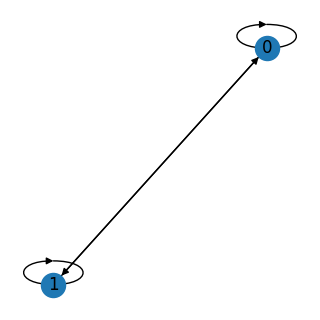

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
graph = nx.DiGraph(nx.from_numpy_array(ergodic_markov_x))
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
initial_state = [0,1]

for start in initial_state:
  states_count= [0,0]
  n=1000
  current_state = start
  # print(current_state, "--->", end=" ")
  while n-1:
      current_state = np.random.choice([0, 1], p=ergodic_markov_x[current_state])
      states_count[current_state] += 1
      # print(current_state, "--->", end=" ")
      n-=1
  time_averaged_behavior = np.divide(states_count,1000)
  print(f'Time-averaged probabilities if intial state is start {start}',time_averaged_behavior)

Time-averaged probabilities if intial state is start 0 [0.509 0.49 ]
Time-averaged probabilities if intial state is start 1 [0.466 0.533]


In [ ]:
for initial_state_vector in [[0,1],[1,0]]:
  t_m = ergodic_markov_x
  next_step_probabilities = np.matmul(initial_state_vector,t_m)
  for i in range(1000):
    next_step_probabilities = next_step_probabilities.dot(t_m)

  print(f'Steady State Probabilities if intial state is {initial_state_vector.index(np.array(initial_state_vector).max())}', next_step_probabilities)

Steady State Probabilities if intial state is 1 [0.48275862 0.51724138]
Steady State Probabilities if intial state is 0 [0.48275862 0.51724138]


We can observe that timed average probabilities and steady state probabilities are almost same for ergodic markov chains.

## **Sensitivity analysis in markov chain:**

**Sensitivity Analysis:** Sensitivity analysis involves analyzing the effect on markov chain behaviour of small change in hyperparameter such as probabilities in transition matrix or intial state selection.

Let's first take initial transition matrix.

In [ ]:
sensitivity_markov_x = np.array(
    [
        [0.35, 0.4, 0.25],
        [0.65, 0.2, 0.15],
        [0.19, 0.61, 0.2]
    ])
sensitivity_markov_x

array([[0.35, 0.4 , 0.25],
       [0.65, 0.2 , 0.15],
       [0.19, 0.61, 0.2 ]])

*Sensitivity analysis by varying transition matrix values.*

* Function **simulate_markov_transition_matrix** take the initial transition matrix and return new transition matrix which has manipulated probabilities values.

In [ ]:
def simulate_markov_transition_matrix(initial_matrix):
  new_markov_matrix = []
  for row in initial_matrix:
    random_value_to_manupilation = np.random.uniform(-0.1, 0.1)
    manipulated_row = row + random_value_to_manupilation
    manipulated_row /= manipulated_row.sum()

    new_markov_matrix.append(manipulated_row)

  return np.abs(new_markov_matrix)

* Function **sensitivity_analysis** generate 15-step random walk for each manipulated transition matrix along with their steady state.

In [ ]:
def sensitivity_analysis(mat,n):
  for i in range(n):
    mat = simulate_markov_transition_matrix(mat)
    print(mat)
    n = 15
    initial_state = 0
    current_state = initial_state
    print(current_state, "--->", end=" ")

    while n-1:
        current_state = np.random.choice([0, 1, 2], p=mat[current_state])
        print(current_state, "--->", end=" ")
        n-=1
    print("stop")

    next_step_probabilities = np.matmul([1,0,0],mat)
    for i in range(1000):
      next_step_probabilities = next_step_probabilities.dot(mat)

    print("Steady State Probabilities", next_step_probabilities)

sensitivity_analysis(sensitivity_markov_x,5)

[[0.34922153 0.3968861  0.25389237]
 [0.62466473 0.21066748 0.16466779]
 [0.20884199 0.57363058 0.21752743]]
0 ---> 0 ---> 2 ---> 1 ---> 1 ---> 2 ---> 0 ---> 1 ---> 0 ---> 1 ---> 0 ---> 0 ---> 0 ---> 1 ---> 0 ---> stop
Steady State Probabilities [0.42017663 0.36638313 0.21344025]
[[0.35081325 0.40325301 0.24593373]
 [0.74937234 0.15815901 0.09246864]
 [0.20142028 0.58795621 0.21062351]]
0 ---> 1 ---> 0 ---> 0 ---> 2 ---> 0 ---> 0 ---> 1 ---> 0 ---> 0 ---> 0 ---> 1 ---> 0 ---> 0 ---> 1 ---> stop
Steady State Probabilities [0.46315477 0.35138553 0.1854597 ]
[[0.34851708 0.39406833 0.25741458]
 [0.67654788 0.18882195 0.13463018]
 [0.18912926 0.61168072 0.19919001]]
0 ---> 1 ---> 1 ---> 1 ---> 0 ---> 2 ---> 1 ---> 2 ---> 1 ---> 0 ---> 1 ---> 1 ---> 0 ---> 2 ---> 1 ---> stop
Steady State Probabilities [0.43562787 0.36327056 0.20110157]
[[0.34898071 0.39592283 0.25509646]
 [0.80152529 0.13619988 0.06227483]
 [0.1491215  0.68890502 0.16197348]]
0 ---> 0 ---> 1 ---> 0 ---> 1 ---> 2 ---> 0 --->

As observed in above outputs that steady state changes if any of the transition probability gets change.

*Sensitivity analysis by selecting different starting state.*

In [ ]:
sen_markov_x = np.array(
    [
        [1.0, 0.0, 0.0, 0.0],
        [0.5, 0.0, 0.5, 0.0],
        [0.0, 0.5, 0.0, 0.5],
        [0.0, 0.0, 0.0, 1.0]
    ])
sen_markov_x

array([[1. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 1. ]])

In [ ]:
initial_state = [0,1,2,3]
results = [[],[],[],[]]

for start in initial_state:
  n=15
  current_state = start
  print(current_state, "--->", end=" ")
  results[start].append(current_state)
  while n-1:
      current_state = np.random.choice([0, 1, 2, 3], p=sen_markov_x[current_state])
      print(current_state, "--->", end=" ")
      results[start].append(current_state)
      n-=1
  print("stop")

  temp = np.zeros(4)
  temp[start] = 1

  next_step_probabilities = np.matmul(temp,sen_markov_x)
  for i in range(1000):
    next_step_probabilities = next_step_probabilities.dot(sen_markov_x)

  print("Steady State Probabilities", next_step_probabilities, " sum of steady state probabilities " , next_step_probabilities.sum())



0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> stop
Steady State Probabilities [1. 0. 0. 0.]  sum of steady state probabilities  1.0
1 ---> 2 ---> 1 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> 0 ---> stop
Steady State Probabilities [6.66666667e-001 0.00000000e+000 4.66631809e-302 3.33333333e-001]  sum of steady state probabilities  1.0
2 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> stop
Steady State Probabilities [3.33333333e-001 4.66631809e-302 0.00000000e+000 6.66666667e-001]  sum of steady state probabilities  1.0
3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> 3 ---> stop
Steady State Probabilities [0. 0. 0. 1.]  sum of steady state probabilities  1.0


As observed in above output that markov chain is sensitive to the starting state beacuse steady state probabilities are different for each different starting state.

**Note**
* If the starting state is transient state then we have 1 probability for that state in steady state. All other state probability will be 0.

## **Visualization in markov chain**


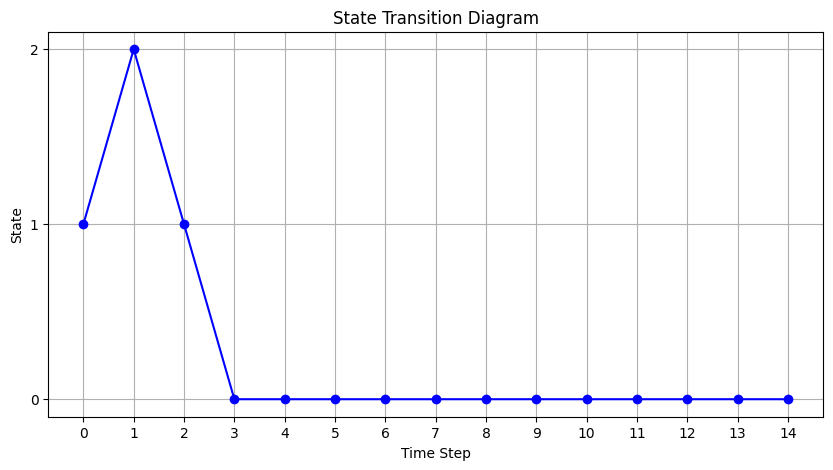

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results[1], marker='o', color='b')
plt.title('State Transition Diagram')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.xticks(range(15))
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

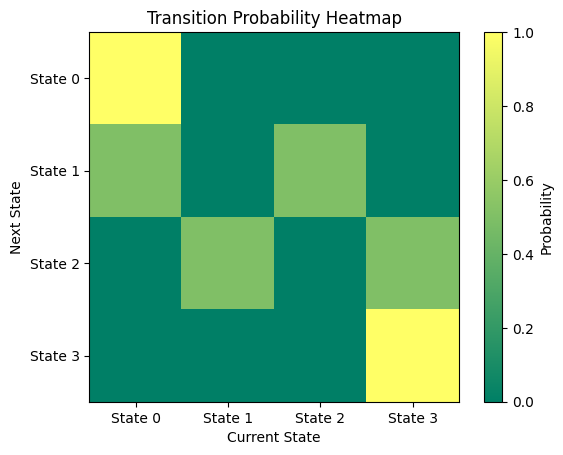

In [ ]:
plt.imshow(sen_markov_x, cmap='summer', interpolation='nearest')
plt.title('Transition Probability Heatmap')
plt.colorbar(label='Probability')
plt.xlabel('Current State')
plt.ylabel('Next State')
plt.xticks([0, 1, 2,3], labels=['State 0', 'State 1', 'State 2','State 3'])
plt.yticks([0, 1, 2,3], labels=['State 0', 'State 1', 'State 2','State 3'])
plt.show()

## **Variance Reduction Techniques**

**Variance Reduction Techniques**: Variance reduction techniques are used to reduce the variance in simulations to reduce the number of simulation steps required without affecting the accuracy of approximating the mathematical problem in the hand.
* By using this technique one can increase the accuracy of simulation result without increasing the computation cost.
* Some variance reduction techniques are **importance sampling, control variates, and antithetic variates.**

1. Importance sampling:
---
* This technique involves sampling data from the original data which had more influence on the desired output. To do this we can change the given distribution to the distribution that focus on important parts of sample.
* Monte carlo approximation use this technique to reduce computational cost and variance.



Let's take example:
Problem: find E[e^x] where x follows normal distribution with mean 0 and variance 1.


In [ ]:
def problem_function(x):
  return np.exp(x)

no_samples = 1000
x_original = np.random.normal(0,1,no_samples)
y_original = problem_function(x_original)

expected_value_of_function_original = np.mean(y_original)
variance_original = np.var(y_original)

print('Expected value of e^x where x is follows N(0,1) by simple approximation: ', expected_value_of_function_original)
print('Variance of e^x where x is follows N(0,1) by simple approximation: ',variance_original)

x_proposed = np.random.normal(1,1,no_samples)
y_proposed = problem_function(x_proposed) * (norm.pdf(x_proposed, 0, 1) / norm.pdf(x_proposed, 1, 1))

expected_value_of_function_proposed = np.mean(y_proposed)
variance_proposed = np.var(y_proposed)

print('Expected value of e^x using importance sampling: ', expected_value_of_function_proposed)
print('Variance of e^x using importance sampling: ',variance_proposed)


Expected value of e^x where x is follows N(0,1) by simple approximation:  1.6109997229985638
Variance of e^x where x is follows N(0,1) by simple approximation:  3.236342145522821
Expected value of e^x using importance sampling:  1.6487212707001286
Variance of e^x using importance sampling:  2.9508328235923474e-31


As observed in the output that value of variance is reduced by using proposed distribution which is similar to original one but only focuses on important parts. Below is the graph that depicts how this two distribution are similar.

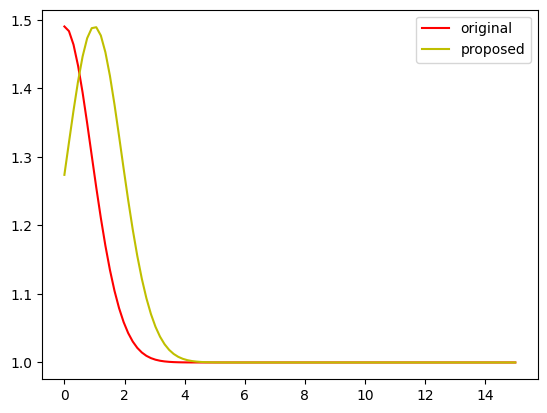

In [ ]:
x = np.linspace(0, 15, 100)
plt.plot(x, problem_function(norm.pdf(x, 0, 1)), "r-", label="original")
plt.plot(x, problem_function(norm.pdf(x, 1, 1)), "y-", label="proposed")
plt.legend()
plt.show()

2. Control Variate:
---
* This technique involves using a extra variable for which the expected values is known and which control the behaviour of the target variable. The chosen extra variable and target variable are correlated in this case.


Let's take example of finding expectation of function x^2 where X follows standard normal distribution.

In [ ]:
no_samples = 100
x_original = np.random.normal(0, 1, no_samples)
y_original = x_original**2

expected_value_of_function_original = np.mean(y_original)
variance_original = np.var(y_original)

print('Expected value of x^2 where x is follows N(0,1) by simple approximation: ', expected_value_of_function_original)
print('Variance of e^x where x is follows N(0,1) by simple approximation: ',variance_original)

extra_variable = np.cov(x_original, y_original)[0, 1] / variance_original
x_squared_adj = y_original - extra_variable * x_original

expected_value_of_function_proposed = np.mean(x_squared_adj)
variance_proposed = np.var(x_squared_adj)

print('Expected value of x^2 using control variate: ', expected_value_of_function_proposed)
print('Variance of x^2 using control variate:: ',variance_proposed)

Expected value of x^2 where x is follows N(0,1) by simple approximation:  1.0939272911071276
Variance of e^x where x is follows N(0,1) by simple approximation:  1.8908215772636336
Expected value of x^2 using control variate:  1.084859495521581
Variance of x^2 using control variate::  1.8495169726904694


As observed variance value decrease by using one extra variable which is related to target variable.

**Note:**
* There are various other type of techniques available for variance reduction, which one is best depends on the problem at hand. One can try all different techniques and use the one with the lowest variance.

## **Comparison of Different Simulation Methods**

**Markov chain** and **Variance reduction techniques** both have different purpose and it depends on problem in hand which one to use.
* Markov chain mostly used for the problem which involves number of states and  transition from one state to another, and task is to find long term behaviour or probability of certain state after some number of state.
* Variance reduction techniques are used to reduce the variance in the simulation task such as monte carlo. The main purpose of this is to decrease the computational cost for given approximation problem and increase the accuracy.

*Comparision of different variance reduction techniques*

In [ ]:
def target_function(x):
    return np.exp(x)
no_samples = 10000

x_simple = np.random.normal(0, 1, no_samples)
y_simple = target_function(x_simple)
expected_value_e_to_x_simple = np.mean(y_simple)

x_importance_sampling = np.random.normal(2, 1, no_samples)
weights = norm.pdf(x_importance_sampling, 0, 1) / norm.pdf(x_importance_sampling, 2, 1)
y_importance_sampling = target_function(x_importance_sampling) * weights
expected_value_e_to_x_importance_sampling = np.mean(y_importance_sampling)

x_control_variate = np.random.normal(0, 1, no_samples)
y_control_variate = target_function(x_control_variate)
extra_variable = np.cov(x_control_variate, y_control_variate)[0, 1] / np.var(x_control_variate)
y_control_variate_sdj = y_control_variate - extra_variable * x_control_variate
expected_value_e_to_x_control_variate = np.mean(y_control_variate_sdj)

print(f"Standard Monte Carlo Estimate: {expected_value_e_to_x_simple}")
print(f"Importance Sampling Estimate: {expected_value_e_to_x_importance_sampling}")
print(f"Control Variates Estimate: {expected_value_e_to_x_control_variate}")


Standard Monte Carlo Estimate: 1.6910937798221417
Importance Sampling Estimate: 1.665815026633771
Control Variates Estimate: 1.6463443492210699


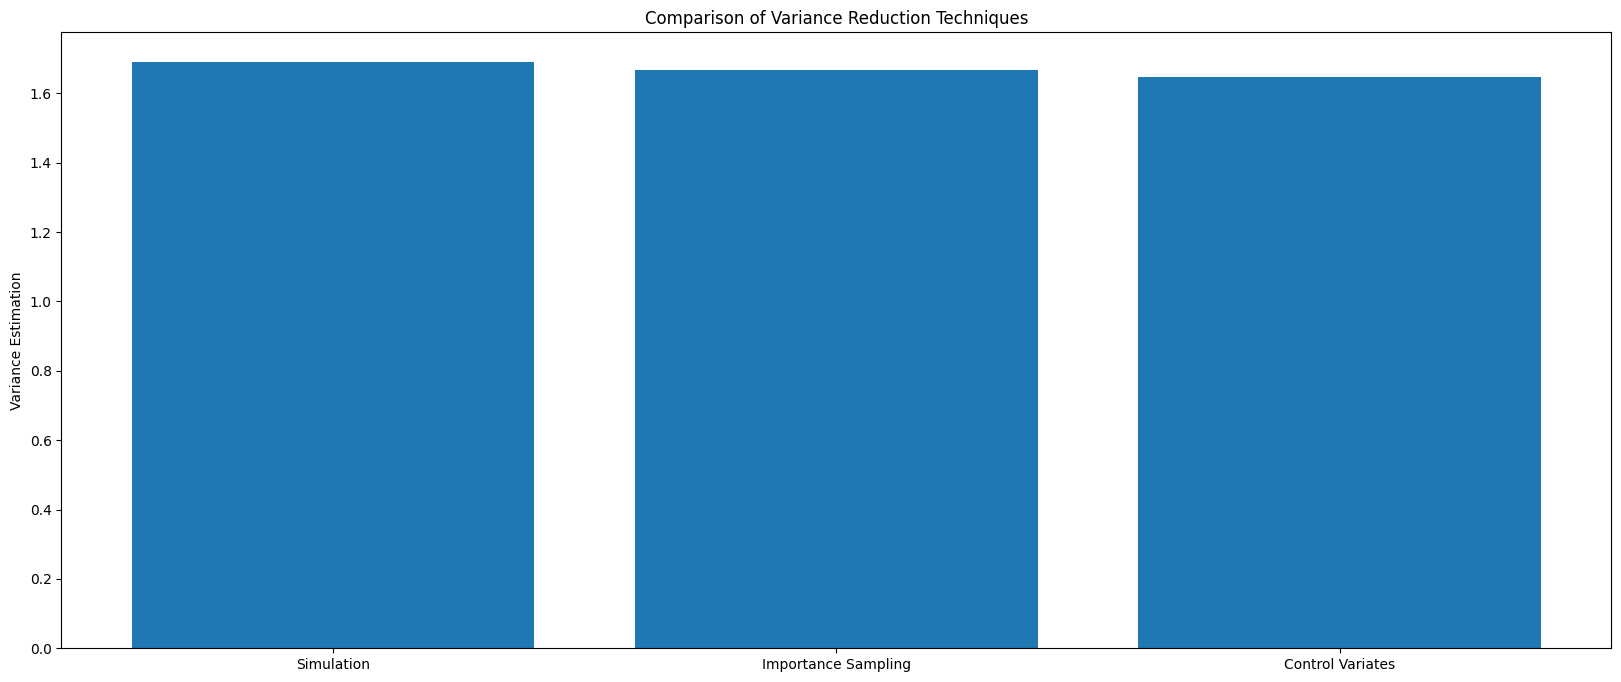

In [ ]:
labels = ['Simulation', 'Importance Sampling', 'Control Variates']
estimations = [expected_value_e_to_x_simple, expected_value_e_to_x_importance_sampling,expected_value_e_to_x_control_variate]
plt.figure(figsize=(20, 8))
plt.bar(labels, estimations)
plt.title('Comparison of Variance Reduction Techniques')
plt.ylabel('Variance Estimation')
plt.show()

## **Simulation for Combinatorial Analysis**

Let's simulate the simple problem related to coin which can be solved using combinatorial analysis.

**problem:** Calculate the probabbilty of getting x number of heads in n number of flips.

e.g.: probabilty of getting 7 heads from 10 flips.

In [ ]:
no_flips = 10
no_trials = 1000
desired_head_count = 7
# here 0 is tail and 1 is head
simulated_results = np.random.randint(0, 2, size=(no_trials, no_flips))
#count heads on each trail
head_count = np.sum(simulated_results,axis=1)
desired_head_count_match = np.sum(desired_head_count == head_count)
probabilty = desired_head_count_match / no_trials

print("Estimated probability with combinatorial analysis",probabilty)

# probabilty with binomial
binomial_prob = np.random.binomial(10,0.5)
prob = st.binom(10,0.5).pmf(7)

print("probability with binomial",prob)

Estimated probability with combinatorial analysis 0.101
probability with binomial 0.11718749999999999


As observed in the output that aproximation of probability with combinatorial analysis and theoratical probabilty using binomial is almost same. In the problem that involve more complexity and not solvale by traditional method combinatorial analysis become a very helpful tool.

## **Real Data Analysis**

In [ ]:
!pip install ucimlrepo

*Download and load the dataset*

In [ ]:
from ucimlrepo import fetch_ucirepo

predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

original_data = pd.concat([X, y], axis=1)

data = pd.concat([X, y], axis=1)
data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Preprocesing of data**

*Handle null value*

In [ ]:
data.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

*Convert categorical data into numerical for easy calculation*

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encod = LabelEncoder()
for col in data.columns:
  if data[col].dtypes=='object':
    data[col]=label_encod.fit_transform(data[col])
data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


As observed in preprocessing step that we have total 37. Here we can perform dimentionality reduction methoc such as factor analysis or PCA to reduce the number of feature and save computational cost.

# **Factor Analysis**

**Factor Analysis:** Factor analysis is one type of dimentionality reduction technique.
* In most of the dataset many of the features are related to one another.
* Factor analysis group this related features which are highly correlated with each other.
* Correlation in different groups are less but correlation in the group is high.
* This groups are known as factors or hidden variable or unobservable variable.

In [ ]:
from factor_analyzer import FactorAnalyzer

Before doing factor analysis we have to check that we can find factor for given dataset or no. To do this we can perform this to test
* Bartlett’s Test: check that features are correlated or no using correlation matrix.
* Kaiser-Meyer-Olkin Test: We use KMO value for this test if the KMO value is less than 0.6 then dataset is not for factor analysis. Here, KMO estimates the proportion of variance among all the observed variable.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(97868.48575047712, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.75340684198297

# *Correlation Matrix*

In [ ]:
correlation_matrix = data.corr()
correlation_matrix.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital Status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107


Analyze how much each feature is contributing to the data.

In [ ]:
variances = data.var()

total_variance = variances.sum()

percent_variances = (variances / total_variance) * 100

variance_table = pd.DataFrame({
    "Feature": variances.index,
    "Actual Variance": variances.map('{:,.2f}'.format) ,
    "Percentage of Total Variance": percent_variances.map('{:,.6f}%'.format)
})

variance_table.sort_values(by='Actual Variance',ascending=False).head()

,Feature,Actual Variance,Percentage of Total Variance
Curricular units 1st sem (approved),Curricular units 1st sem (approved),9.57,0.000225%
Curricular units 2nd sem (approved),Curricular units 2nd sem (approved),9.09,0.000213%
Unemployment rate,Unemployment rate,7.10,0.000167%
Mother's occupation,Mother's occupation,697.92,0.016379%
Father's occupation,Father's occupation,638.22,0.014978%


**Eigenvalue:** Eigen value represent how much varience can be explained by the given factor.

In [ ]:
fa = FactorAnalyzer()
fa.fit(data, data.shape[1])

ev, v = fa.get_eigenvalues()
ev

array([6.51015713, 3.82449567, 2.14229475, 2.02182291, 1.94909042,
       1.68369877, 1.59384129, 1.55148185, 1.29219171, 1.26158957,
       1.11171145, 1.0155583 , 0.99106536, 0.94246669, 0.87355718,
       0.82072443, 0.81254995, 0.73528337, 0.66816286, 0.58832975,
       0.56690723, 0.53504903, 0.46612792, 0.45405199, 0.41435264,
       0.39280335, 0.34955488, 0.31468639, 0.23109542, 0.2061766 ,
       0.18855228, 0.16421275, 0.09314981, 0.0904675 , 0.08665762,
       0.03533874, 0.0207424 ])

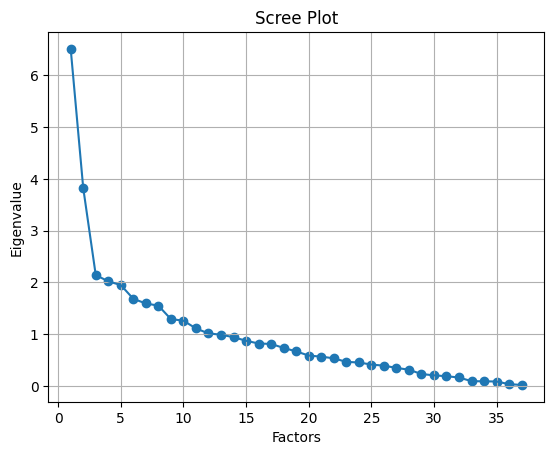

In [ ]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

There is no specific method to select the number of factor for factor analysis. but we can use technique such as take all the factor which has eigen value greater than 1 or observe elbow shape in screeplot. For this implementation elbow shows 3 factors.

**Factor Loading:** How the orignal feature and factors are correlated.


In [ ]:
# num_factors = sum(ev > 1)
num_factors = 3

fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(data)

factor_loadings = pd.DataFrame(fa.loadings_, columns=[f'Factor {i+1}' for i in range(num_factors)])
factor_loadings

,Factor 1,Factor 2,Factor 3
0,0.025401,0.360124,0.013357
1,0.105207,0.594906,-0.056901
2,-0.019945,-0.324248,0.021092
3,0.292980,-0.034719,0.061910
4,-0.030650,-0.355866,-0.000138
5,0.086325,0.253421,-0.044302
6,0.005442,-0.118193,-0.021257
7,-0.014219,-0.001189,0.049499
8,0.038989,0.225763,0.081370
9,0.043514,0.154213,0.080972


communalities means how much variance of 37 variables can be explained by 3 factors.

In [ ]:
fa.get_communalities()

array([0.13051262, 0.36821943, 0.10597958, 0.09087566, 0.12757998,
       0.07363677, 0.01445112, 0.00265374, 0.05911005, 0.03223146,
       0.85712546, 0.84931706, 0.00906934, 0.14768339, 0.00203315,
       0.07202222, 0.16381504, 0.0835459 , 0.10207986, 0.45155399,
       0.0024999 , 0.64751822, 0.84955515, 0.55454138, 0.89443513,
       0.5924172 , 0.04081369, 0.6332094 , 0.75454249, 0.47554943,
       0.86391052, 0.64279539, 0.0340564 , 0.02332586, 0.00168397,
       0.03702899, 0.44599269])

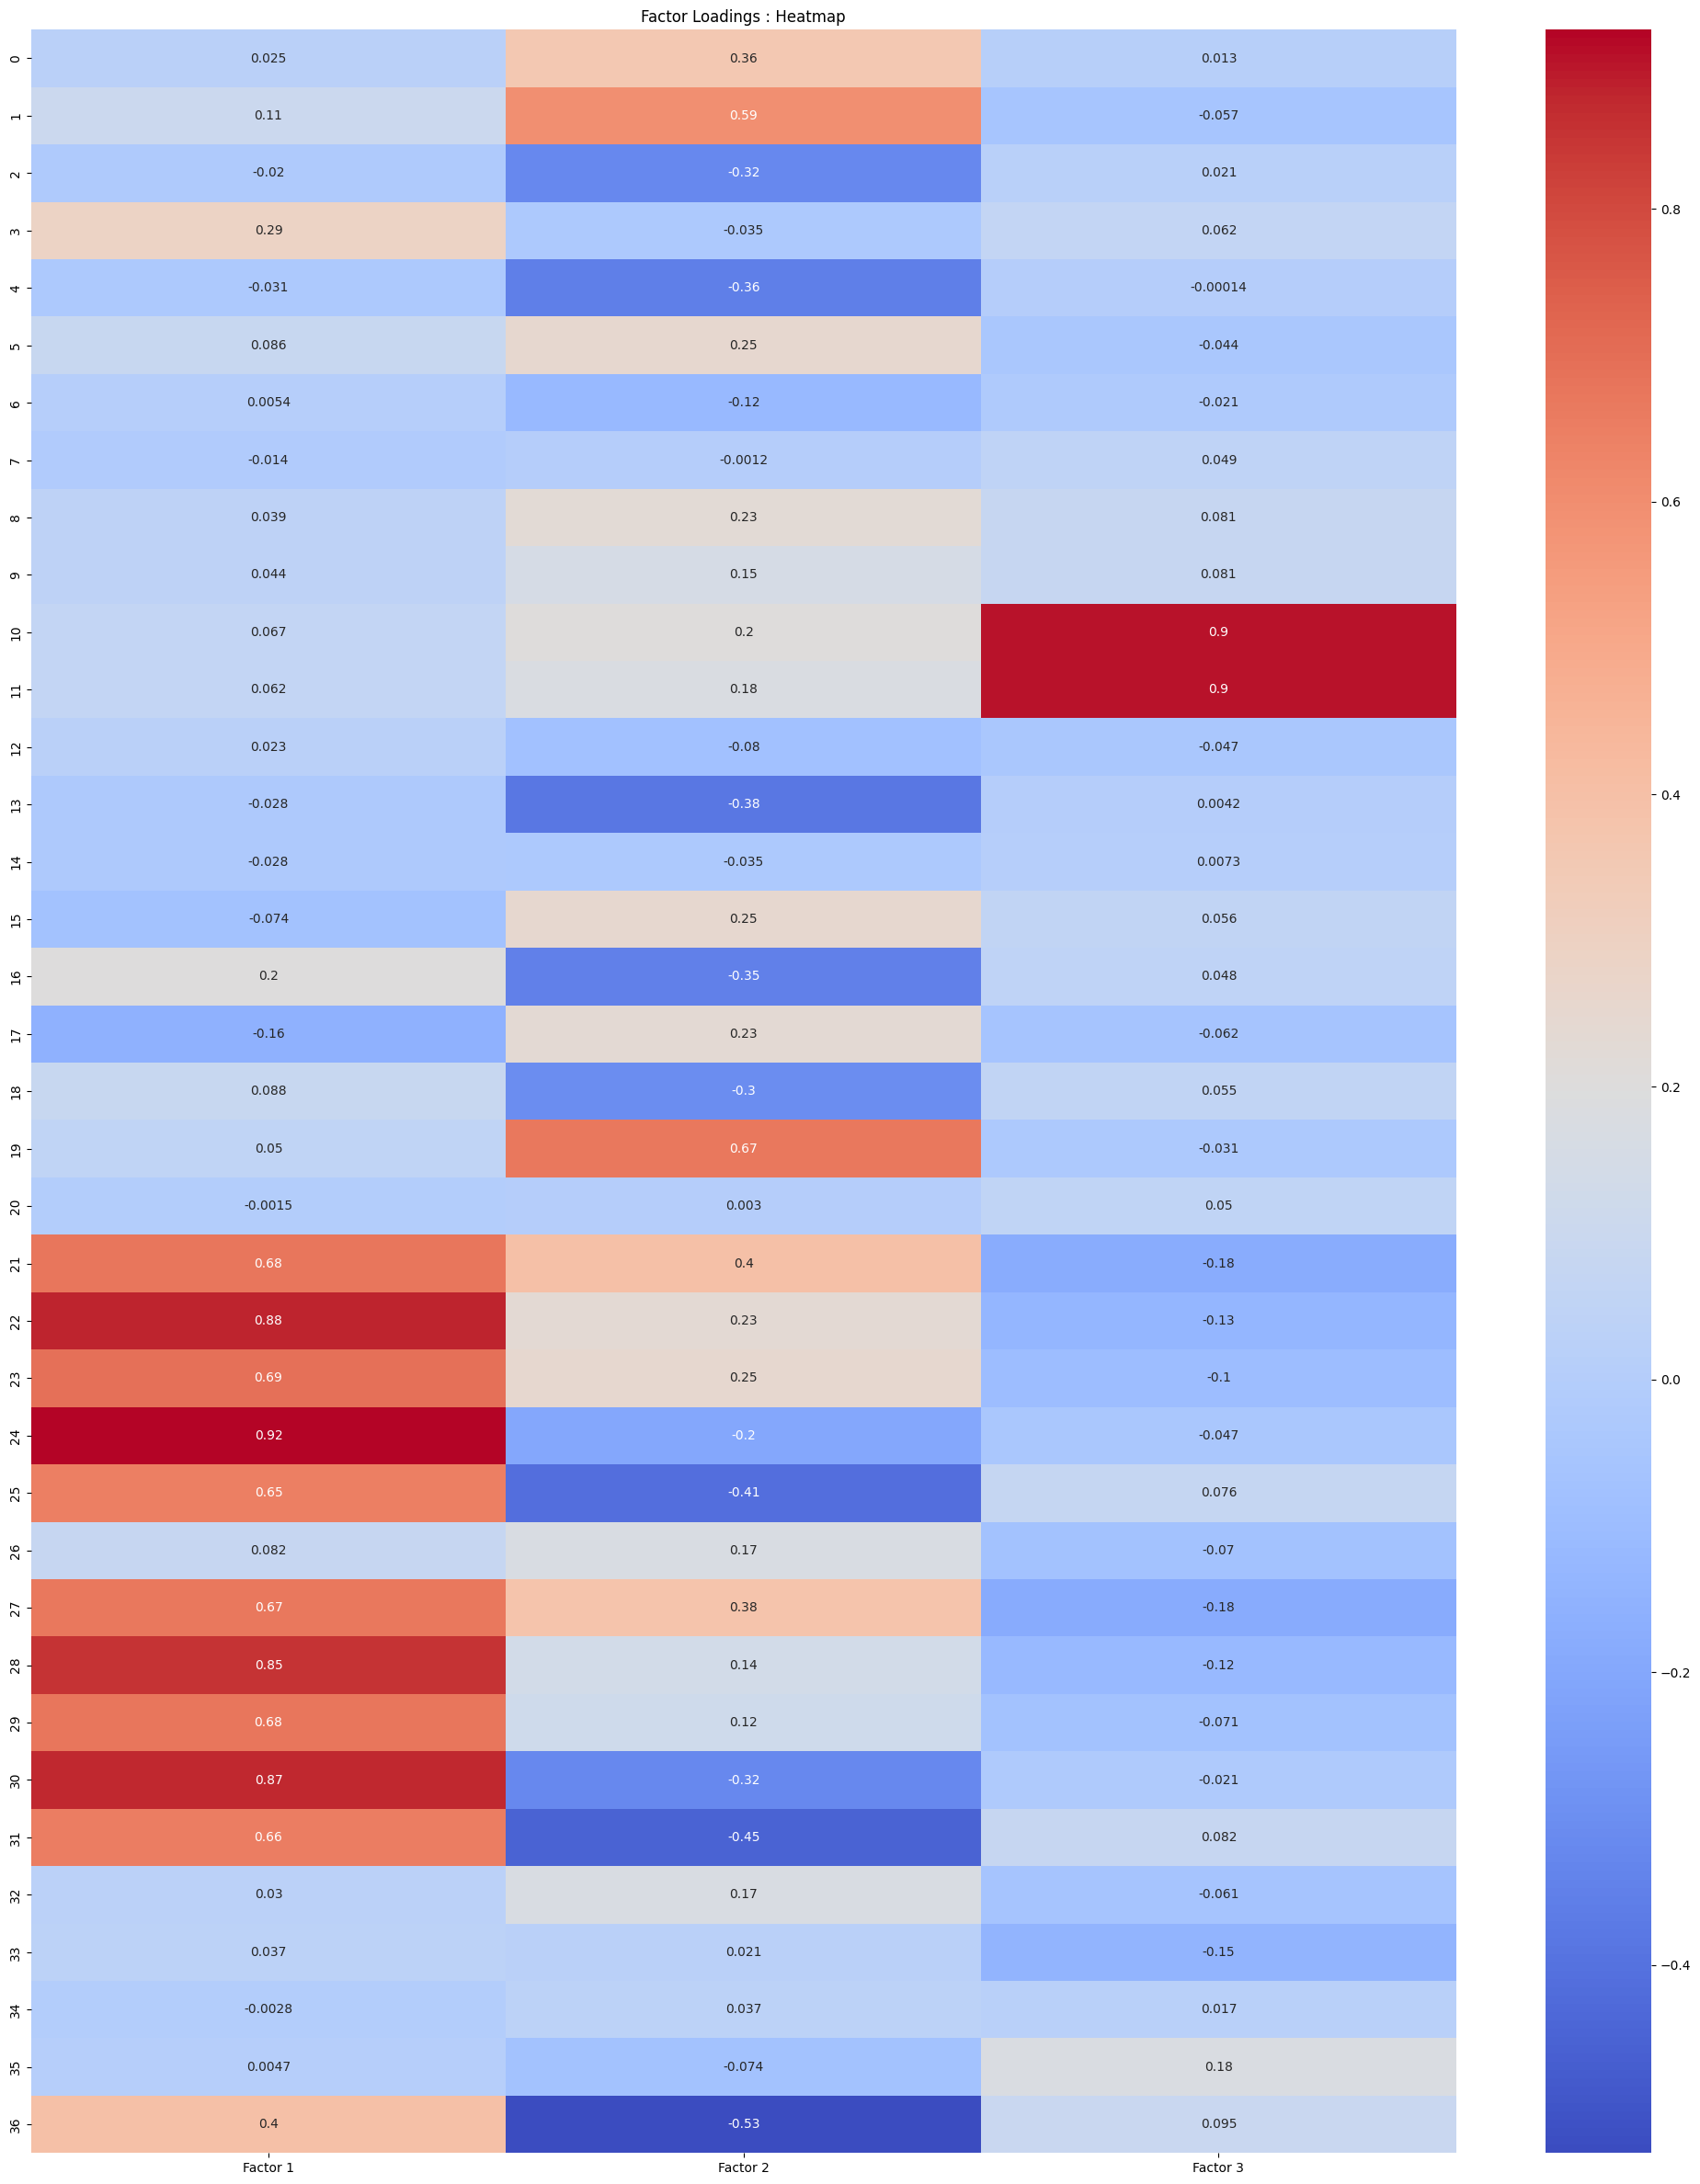

In [ ]:
plt.figure(figsize=(25, 30))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm")
plt.title("Factor Loadings : Heatmap")
plt.show()

We can infer from the heatmap that,

Factor_1 has a high influence on 22nd,24th,28th and 30th feature.

Factor_2 has a high influence on 19th and 1st feature.

Factor_3 has a high influence on 10th and 11th feature.

We can also infer that variance distribution is maximum on the initial factors

In [ ]:
X = data.drop(['Target'],axis=1)
y = data['Target']

**Bayes Theorem**

*Formula*

P(A|B) = (P(B|A) * P(A)) / P(B)

P(A) = Prior probability or Marginal probability of A.

P(A|B) = Conditional probability of A, given B. It is also called
posterior probability.

P(B|A) = Conditional probability of B given A.

P(B) = Prior or Marginal probability of B.


In [ ]:
probs = X.groupby(y).apply(lambda x: len(x) / len(X))

total_probability_target_0 = probs[0]
total_probability_target_1 = probs[1]
total_probability_target_2 = probs[2]

total_probability_target_0,total_probability_target_1,total_probability_target_2

(0.3212025316455696, 0.1794755877034358, 0.4993218806509946)

Probability of each class calculated using formula ( P = number of observation of given class / Total observation ):  

P(Target = 0 (Dropout)) = 0.32

P(Target = 1 (Graduate)) = 0.18

P(Target = 2 (Enrolled)) = 0.50

Probability of Marital Status being 2 given target variable is 1,

**A = Marital Status is 2 (married)**

**B = Target is 0 (Dropout)**

P(A/B) = P(Marital Status = 2 | Target = 1)

Using bayes theorem we can write like below:

P(Marital Status = 2 | Target = 1) = (P(Target = 1 | Marital Status = 2) * P(Marital Status = 2)) / P(Target = 1)

In [ ]:
def bayes_theorem_calculation(data_dataframe, feature_name, feature_value, target_feature_name, target_feature_value):
    filtered_data_dataframe = data_dataframe[data_dataframe[feature_name] == feature_value]
    total_filtered = len(filtered_data_dataframe)
    target_and_variable = len(filtered_data_dataframe[(filtered_data_dataframe[target_feature_name] == target_feature_value)])
    probability = (target_and_variable / total_filtered) * (total_filtered / len(data_dataframe)) / probs[target_feature_value]
    return probability

In [ ]:
probability = bayes_theorem_calculation(data, 'Marital Status', 2, 'Target', 0)
print("Probability of Marital Status being 2 (married) given Target is 0 (Dropout):", probability)

Probability of Marital Status being 2 (married) given Target is 0 (Dropout): 0.12596762843068263


**Joint Distribution Analysis**

Joint Distribution Analysis: This is a process of analyzing probability of two random variable which follows joint probability distribution.

In [ ]:
joint_probability = pd.crosstab(data['Marital Status'], data['Target'], normalize='all')

print("Joint Probability Distribution:")
print(joint_probability)

Joint Probability Distribution:
Target                 0         1         2
Marital Status                              
1               0.267631  0.162749  0.455470
2               0.040461  0.011754  0.033454
3               0.000226  0.000452  0.000226
4               0.009494  0.003617  0.007459
5               0.002486  0.000678  0.002486
6               0.000904  0.000226  0.000226


The above output also called contingency table is showing joint distibution of feature "Marital status" and "Target".

We can find probabilities associated with "Marital status" and "Target" from this table.

P(Marital status = 1, Target = 0(Dropout)) = 0.27

# **Conclusion**
Implementation of various statistical measures with the simulation of continuous and discrete random variables clearly explains the properties of distributions, which makes it easier to understand the data distribution in the real world. The use of the Markov chain allowed us to understand state transition probabilities and how only the current state is important for transitioning from one state to another. Variance reduction techniques explain how reducing variance increases accuracy. The analysis of real-world data, which includes methods such as Bayes theorem and factor analysis, made it possible to understand the real-world application of these methods. Factor analysis works really efficiently on these datasets; it reduces 36 features to 3 features, which explain most of the of the variance in the data. Looking forward, there are potential improvements, such as implementing a complete ML pipeline to make a prediction model, that can be done in the future to make this project useful on a large scale.


# **References**

[1] https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

[2] https://www.datacamp.com/tutorial/introduction-factor-analysis